# Real Estate Data Analysis – ImmoEliza

## Project Overview

The goal of this challenge is to support the real estate company *ImmoEliza* in its ambition to become the leading real estate player in Belgium. To do so, the company needs a strong pricing strategy based on data.

Before building a machine learning model, we will perform a thorough data analysis to:

- Understand the structure and content of the dataset
- Clean and prepare the data
- Extract key insights for business decision-making
- Visualize patterns and trends in the Belgian real estate market

This project is carried out as part of the `challenge-data-analysis`.

## Team Members
- [Evi]
- [Moussa]
- [Yves]

---

# Challenge: Real Estate Data Analysis – Checklist

This notebook follows a step-by-step structure to meet all expectations from the `challenge-data-analysis` prompt.


## Step 1 – Data Cleaning

Ensure the dataset is clean before starting any analysis:

1.1 Remove duplicates  
1.2 Remove blank spaces (e.g., " I love python " → "I love python")  
1.3 Fix any errors or invalid formats  
1.4 Handle missing values (drop or impute nulls)


## Step 2 – Data Analysis

Answer the following key questions using pandas, matplotlib, seaborn, or plotly:

2.1 How many rows and columns are in the dataset?  
2.2 What is the correlation between variables and the price?  
2.3 Why might those variables be correlated?  
2.4 How are variables correlated to each other?  
2.5 What might explain these relationships?  
2.6 Which variables have the greatest influence on the price?  
2.7 Which variables have the least influence on the price?  
2.8 How many qualitative (categorical) and quantitative (numerical) variables are there?  
2.9 How would you transform categorical values into numeric ones?  
2.10 What is the percentage of missing values per column?


## Step 3 – Data Interpretation

Interpret the results and provide clear, actionable insights:

3.1 Plot the outliers (visually detect anomalies)  
3.2 Which variables would you delete and why?  
3.3 Create a histogram showing the number of properties by surface area  
3.4 In your opinion, which 5 variables are the most important and why?  
3.5 What are the most expensive municipalities in Belgium? (average price, median price, price per m<sup>2</sup>)  
3.6 What are the most expensive municipalities in Wallonia?  
3.7 What are the most expensive municipalities in Flanders?  
3.8 What are the least expensive municipalities in Belgium?  
3.9 What are the least expensive municipalities in Wallonia?  
3.10 What are the least expensive municipalities in Flanders?

---

## Bonus (Optional)

B1 Answer additional creative or unexpected questions  
B2 Use statistical tests (e.g. pointbiserialr, ANOVA, Kruskal-Wallis)  
B3 Ensure visualizations include clear color choices, axis labels, titles, legends, and clean layout

---


# Step 1 – Data Cleaning
Ensure the dataset is clean before starting any analysis:

1.1 Remove duplicates  
1.2 Remove blank spaces 
1.3 Fix any errors or invalid formats  
1.4 Handle missing values (drop or impute nulls)


## Import Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

## Load the Dataset


In [2]:
csv_path = "../data/immoweb_real_estate.csv"
df = pd.read_csv(csv_path)

## First Glance at the Data
  - Dataset shape
  - Column names
  - Data types
  - First rows (`.head()`)

In [3]:
# Display dataset shape: number of rows and columns
print("Dataset shape:", df.shape)

# Display column names
print("\nColumn names:")
print(df.columns.tolist())

# Display data types
print("\nData types:")
print(df.dtypes)

# Display the first 5 rows
df.head()

Dataset shape: (80368, 53)

Column names:
['Unnamed: 0', 'id', 'url', 'type', 'subtype', 'bedroomCount', 'bathroomCount', 'province', 'locality', 'postCode', 'habitableSurface', 'roomCount', 'monthlyCost', 'hasAttic', 'hasBasement', 'hasDressingRoom', 'diningRoomSurface', 'hasDiningRoom', 'buildingCondition', 'buildingConstructionYear', 'facedeCount', 'floorCount', 'streetFacadeWidth', 'hasLift', 'floodZoneType', 'heatingType', 'hasHeatPump', 'hasPhotovoltaicPanels', 'hasThermicPanels', 'kitchenSurface', 'kitchenType', 'landSurface', 'hasLivingRoom', 'livingRoomSurface', 'hasBalcony', 'hasGarden', 'gardenSurface', 'gardenOrientation', 'parkingCountIndoor', 'parkingCountOutdoor', 'hasAirConditioning', 'hasArmoredDoor', 'hasVisiophone', 'hasOffice', 'toiletCount', 'hasSwimmingPool', 'hasFireplace', 'hasTerrace', 'terraceSurface', 'terraceOrientation', 'accessibleDisabledPeople', 'epcScore', 'price']

Data types:
Unnamed: 0                    int64
id                          float64
url 

,Unnamed: 0,id,url,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,...,hasOffice,toiletCount,hasSwimmingPool,hasFireplace,hasTerrace,terraceSurface,terraceOrientation,accessibleDisabledPeople,epcScore,price
0,0,20661494.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,True,7.0,NaN,NaN,C,399000.0
1,1,20647642.0,https://www.immoweb.be/en/classified/house/for...,HOUSE,HOUSE,4.0,2.0,Brussels,Etterbeek,1040,...,True,3.0,NaN,NaN,True,1.0,NaN,NaN,E,895000.0
2,2,20644816.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,True,2.0,NaN,NaN,F,465000.0
3,3,20659813.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,2.0,Brussels,Bruxelles,1040,...,NaN,2.0,NaN,NaN,True,3.0,NaN,NaN,B,590000.0
4,4,20633249.0,https://www.immoweb.be/en/classified/flat-stud...,APARTMENT,FLAT_STUDIO,1.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,E,289000.0


## 1.1 Remove Duplicates

In [22]:
print(f"Rows before duplicate removal: {len(df)}")
df = df.drop_duplicates()
print(f"Remaining rows after duplicate removal: {len(df)}")

Rows before duplicate removal: 80368
Remaining rows after duplicate removal: 80368


## 1.2 Remove blank spaces

In [34]:
csv_path = "../data/immoweb_real_estate.csv"
df = pd.read_csv(csv_path)


string_columns = df.select_dtypes(include='object').columns

# Detect how many cells have leading/trailing whitespace
spaces_per_column = df[string_columns].apply(
    lambda col: col.astype(str).apply(lambda x: x != x.strip())
).sum()

total_cells_with_spaces = spaces_per_column.sum()

if total_cells_with_spaces > 0:
    print(f"Found {total_cells_with_spaces} cells with leading/trailing spaces across {spaces_per_column[spaces_per_column > 0].count()} columns.")
    print("Cleaning blank spaces...")
    df[string_columns] = df[string_columns].apply(lambda col: col.astype(str).str.strip())
    print("Blank spaces removed.")
else:
    print("No leading/trailing blank spaces found in string columns.")


No leading/trailing blank spaces found in string columns.


## 1.3 Fix any errors or invalid formats  

In [35]:
import pandas as pd

csv_path = "../data/immoweb_real_estate.csv"
df = pd.read_csv(csv_path)

# Step 1: Missing values
missing_values = df.isnull().sum()
total_missing = missing_values.sum()

# Step 2.1: Invalid numeric values
invalid_surface = df[df["habitableSurface"] <= 0].shape[0]
invalid_price = df[df["price"] <= 0].shape[0]

# Step 2.2: Invalid construction years
future_construction = df[df["buildingConstructionYear"] > 2025].shape[0]
ancient_construction = df[df["buildingConstructionYear"] < 1800].shape[0]

# Step 2.3: Unexpected boolean formats
terrace_unique = df["hasTerrace"].dropna().unique().tolist()
livingroom_unique = df["hasLivingRoom"].dropna().unique().tolist()

# Step 3: Inconsistent categorical variables
heating_types = df["heatingType"].dropna().unique().tolist()
kitchen_types = df["kitchenType"].dropna().unique().tolist()
building_conditions = df["buildingCondition"].dropna().unique().tolist()

# Step 4: Duplicate rows
duplicates = df.duplicated().sum()

# Final summary
summary = {
    "Total missing values": total_missing,
    "Properties with surface <= 0": invalid_surface,
    "Properties with price <= 0": invalid_price,
    "Future construction years (>2025)": future_construction,
    "Too old construction years (<1800)": ancient_construction,
    "Duplicate rows": duplicates,
    "Unique values in 'hasTerrace'": terrace_unique,
    "Unique values in 'hasLivingRoom'": livingroom_unique,
    "Unique heating types": heating_types,
    "Unique kitchen types": kitchen_types,
    "Unique building conditions": building_conditions
}

summary


{'Total missing values': 2396576,
 'Properties with surface <= 0': 0,
 'Properties with price <= 0': 0,
 'Future construction years (>2025)': 413,
 'Too old construction years (<1800)': 52,
 'Duplicate rows': 0,
 "Unique values in 'hasTerrace'": [True],
 "Unique values in 'hasLivingRoom'": [True],
 'Unique heating types': ['GAS',
  'FUELOIL',
  'ELECTRIC',
  'PELLET',
  'SOLAR',
  'CARBON',
  'WOOD'],
 'Unique kitchen types': ['SEMI_EQUIPPED',
  'INSTALLED',
  'HYPER_EQUIPPED',
  'NOT_INSTALLED',
  'USA_UNINSTALLED',
  'USA_HYPER_EQUIPPED',
  'USA_INSTALLED',
  'USA_SEMI_EQUIPPED'],
 'Unique building conditions': ['GOOD',
  'TO_BE_DONE_UP',
  'AS_NEW',
  'JUST_RENOVATED',
  'TO_RENOVATE',
  'TO_RESTORE']}

## 1.4 Handle Missing Values
- 1.4.1 Display Count of Missing Values per Column
- 1.4.2 Show Percentage of Missing Values
- 1.4.3. Save new dataset with missing values removed 
  - Drop columns with more than 50% missing values
  - Drop remaining rows with any missing value

### 1.4.1 Display Count of Missing Values per Column

In [5]:
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)
print("Missing values per column:\n", missing_counts)

Missing values per column:
 accessibleDisabledPeople    80368
hasBalcony                  80368
monthlyCost                 80368
hasAirConditioning          79244
hasSwimmingPool             78552
hasDressingRoom             77740
hasFireplace                77324
hasThermicPanels            77256
hasArmoredDoor              76670
gardenOrientation           74767
diningRoomSurface           73467
hasHeatPump                 72895
hasPhotovoltaicPanels       72320
hasOffice                   69981
terraceOrientation          69106
hasAttic                    67852
hasDiningRoom               66227
streetFacadeWidth           64858
gardenSurface               64410
hasGarden                   64410
hasVisiophone               64377
parkingCountOutdoor         62042
hasLift                     61324
roomCount                   58420
kitchenSurface              56105
parkingCountIndoor          52129
terraceSurface              51769
livingRoomSurface           51418
hasBasement         

### 1.4.2 Show Percentage of Missing Values

In [6]:
missing_percentage = (df.isnull().mean() * 100).sort_values(ascending=False)
print("Percentage of missing values:\n", missing_percentage[missing_percentage > 0])

Percentage of missing values:
 accessibleDisabledPeople    100.000000
hasBalcony                  100.000000
monthlyCost                 100.000000
hasAirConditioning           98.601433
hasSwimmingPool              97.740394
hasDressingRoom              96.730042
hasFireplace                 96.212423
hasThermicPanels             96.127812
hasArmoredDoor               95.398666
gardenOrientation            93.030808
diningRoomSurface            91.413249
hasHeatPump                  90.701523
hasPhotovoltaicPanels        89.986064
hasOffice                    87.075702
terraceOrientation           85.986960
hasAttic                     84.426637
hasDiningRoom                82.404688
streetFacadeWidth            80.701274
gardenSurface                80.143838
hasGarden                    80.143838
hasVisiophone                80.102777
parkingCountOutdoor          77.197392
hasLift                      76.304002
roomCount                    72.690623
kitchenSurface               69.8

#### Observations
- **Very high missingness** (>95%) in features such as `accessibleDisabledPeople`, `hasBalcony`, `monthlyCost`, and several others (e.g., `hasAirConditioning`, `hasSwimmingPool`) — likely optional or luxury-related fields. These should be dropped or carefully imputed only if essential.
- **High missingness** (80–95%) in features such as `gardenSurface`, `streetFacadeWidth`, `hasDiningRoom`, `hasAttic` — consider converting to binary flags or imputing selectively if they enhance model performance.
- **Moderate missingness** (40–80%) in important structural or spatial attributes like `roomCount`, `kitchenSurface`, `terraceSurface`, `livingRoomSurface`, `landSurface`, `hasBasement`, and `hasTerrace` — suitable candidates for imputation using medians or predictive models.
- **Low to moderate missingness** (10–40%) in features such as `floorCount`, `kitchenType`, `heatingType`, `buildingConstructionYear`, `buildingCondition`, and `epcScore` — many of these are important and can be imputed or flagged.
- **Low missingness** (<10%) in `bedroomCount`, `price`, `habitableSurface`, and `bathroomCount` — essential for pricing models and straightforward to impute.

#### Column-by-Column Recommendations
| Column                     | Missing % | Recommendation |
|----------------------------|------------|----------------|
| `accessibleDisabledPeople` | 100.0%     | Drop — no usable data. |
| `hasBalcony`               | 100.0%     | Drop or convert to `has_balcony` flag if imputation possible. |
| `monthlyCost`              | 100.0%     | Drop — unusable without recovery. |
| `hasAirConditioning`       | 98.6%      | Drop or impute with flag; likely luxury feature. |
| `hasSwimmingPool`          | 97.7%      | Drop or binary flag — rarely present. |
| `gardenSurface`            | 80.1%      | Impute with model (correlates with `hasGarden`, `landSurface`). |
| `hasGarden`                | 80.1%      | Create `has_garden` flag if useful — otherwise drop. |
| `roomCount`                | 72.7%      | Important — impute with median or model. |
| `terraceSurface`           | 64.4%      | Predictive imputation — strong influence on price. |
| `livingRoomSurface`        | 64.0%      | Impute using correlated surface features. |
| `landSurface`              | 50.8%      | Keep and impute — important for houses. |
| `kitchenType`              | 47.8%      | Categorical — impute with `"unknown"` or mode. |
| `heatingType`              | 41.3%      | Impute with mode or group-based frequency. |
| `hasTerrace`               | 41.0%      | Create binary flag if useful. |
| `buildingConstructionYear`| 38.9%      | Impute with median — valuable for age analysis. |
| `epcScore`                 | 18.6%      | Impute — energy rating relevant in pricing. |
| `bathroomCount`            | 17.0%      | Impute with median. |
| `habitableSurface`         | 15.7%      | Essential — impute with care. |
| `bedroomCount`             | 8.5%       | Critical — simple imputation acceptable. |
| `price`                    | 5.0%       | Drop rows with missing price — cannot model without target. |

#### Strategic Considerations
- For **machine learning** workflows:
  - Drop completely empty columns.
  - Convert optional features into binary indicators (e.g., `has_garden`, `has_swimming_pool`).
  - Impute core attributes (e.g., surfaces, counts) using median, KNN, or regression models.
  - Avoid imputation on the target variable `price`; drop those rows instead.

- For **BI/dashboard reporting**:
  - Represent missing values clearly (e.g., `"unknown"`, `"not available"`).
  - Keep user expectations in mind when interpreting incomplete fields.

#### Next Steps
- Visualize missingness with tools such as seaborn's heatmap or missingno.
- For each feature, decide whether to **drop**, **impute**, or **transform**.
- Document and version all preprocessing decisions for reproducibility.

### 1.4.3. Save new dataset with missing values removed 

Visual representations of missing values help detect patterns across the dataset:

- A **heatmap** shows missing entries row by row, which can highlight clusters or anomalies.
- A **bar plot** (via `missingno`) summarizes the missing value count per feature, sorted for easier prioritization.

These visualizations support decision-making when choosing which columns to drop, impute, or transform.


#### Approach 1 – Heatmap using seaborn

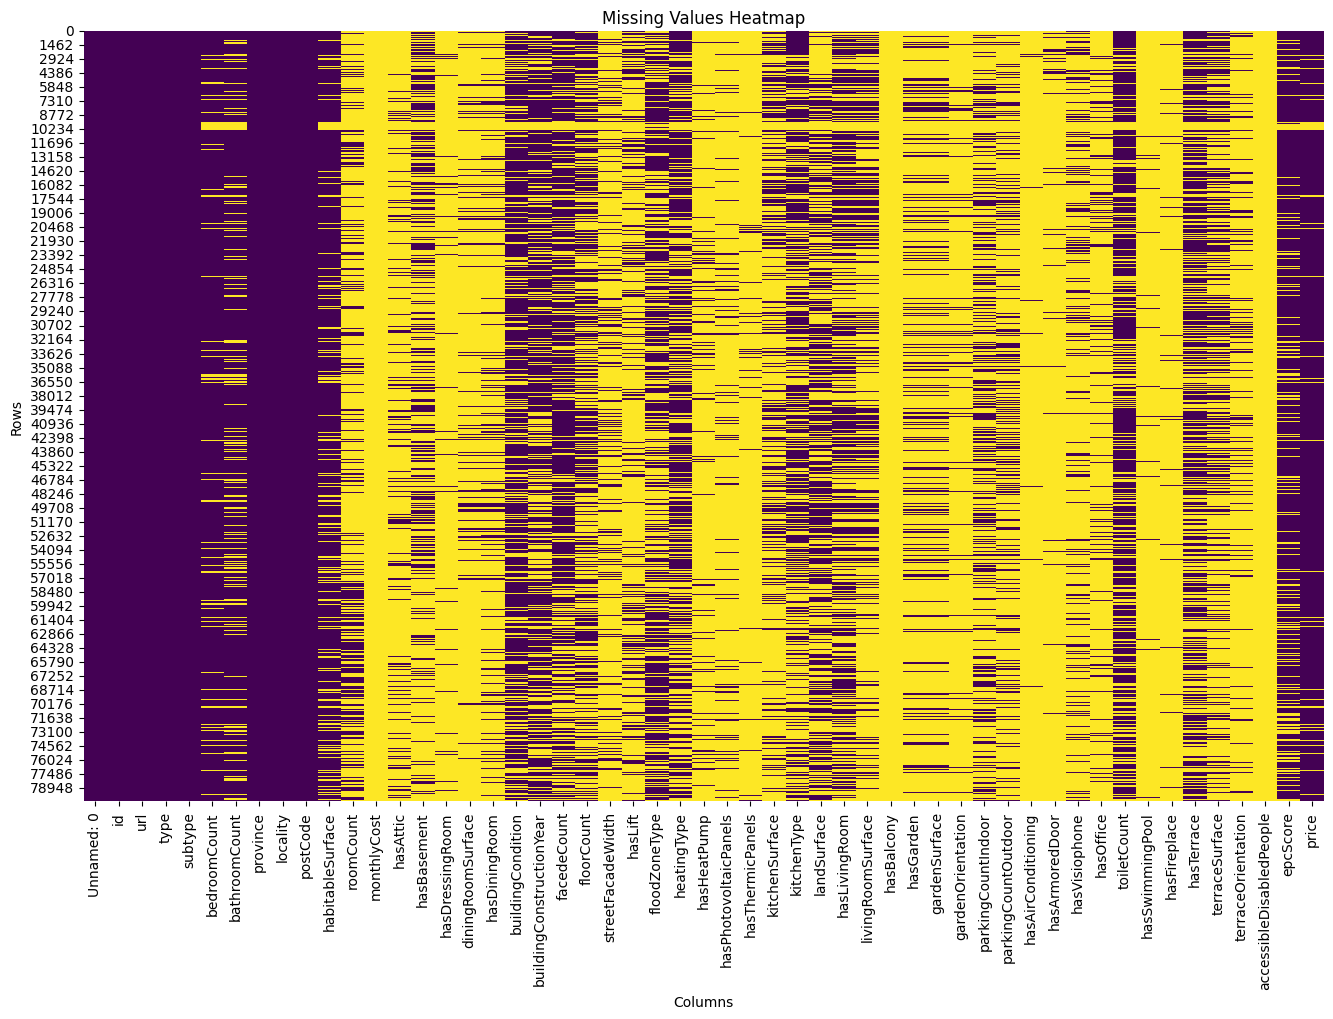

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of missing values
plt.figure(figsize=(16, 10))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

### Missing Values Heatmap – Detailed Interpretation

This heatmap, created using `seaborn`, visualizes missing values (`NaN`) across the dataset:

- **Color Coding:**
  - **Yellow** = missing value
  - **Purple** = observed (non-missing) value

#### Key Observations
- **Entirely missing columns** such as `accessibleDisabledPeople`, `hasBalcony`, and `monthlyCost` are fully yellow, confirming they should be **dropped** from the dataset.
- A large number of features show **over 60–90% missing values**, particularly attributes like:
  - `hasSwimmingPool`, `hasDressingRoom`, `hasThermicPanels`, `gardenSurface`, etc.
  - These may represent rare or optional features, and should be imputed only if relevant to model performance.
- **Core features** like `price`, `bedroomCount`, `bathroomCount`, and `habitableSurface` are mostly purple, indicating good data quality for primary predictive modeling.
- Some columns show **mixed patterns**, which may hint at conditional missingness:
  - For example, `gardenSurface` is often missing when `hasGarden` is also missing — suggesting feature dependency.
  - Similarly, `terraceSurface` may be missing only when `hasTerrace` is False or missing.

#### Usefulness of the Heatmap
- The heatmap helps visually **identify:
  - Which features are consistently problematic (drop or flag),
  - Where missing values might align across rows (entire records to drop),
  - Which missing patterns are possibly structured (e.g., depending on property type or region).

#### Next Actions
- Cross-reference this heatmap with the percentage table of missing values.
- Document each column's strategy: **Drop**, **Impute**, or **Transform**.
- Consider advanced tools (e.g., `missingno`, correlation matrix of missing values) to analyze interdependencies between features.

This visualization provides a solid foundation for cleaning and engineering the dataset in preparation for modeling or BI use.



### Approach 2 - Matrix View

The matrix plot provides a detailed overview of the distribution and alignment of missing values across the dataset.
- Each row represents an individual observation (listing).
- Vertical white lines = missing values.
- Solid vertical bars = complete data in that column.
- A sparkline at the bottom shows data density across rows.

<Figure size 2000x1000 with 0 Axes>

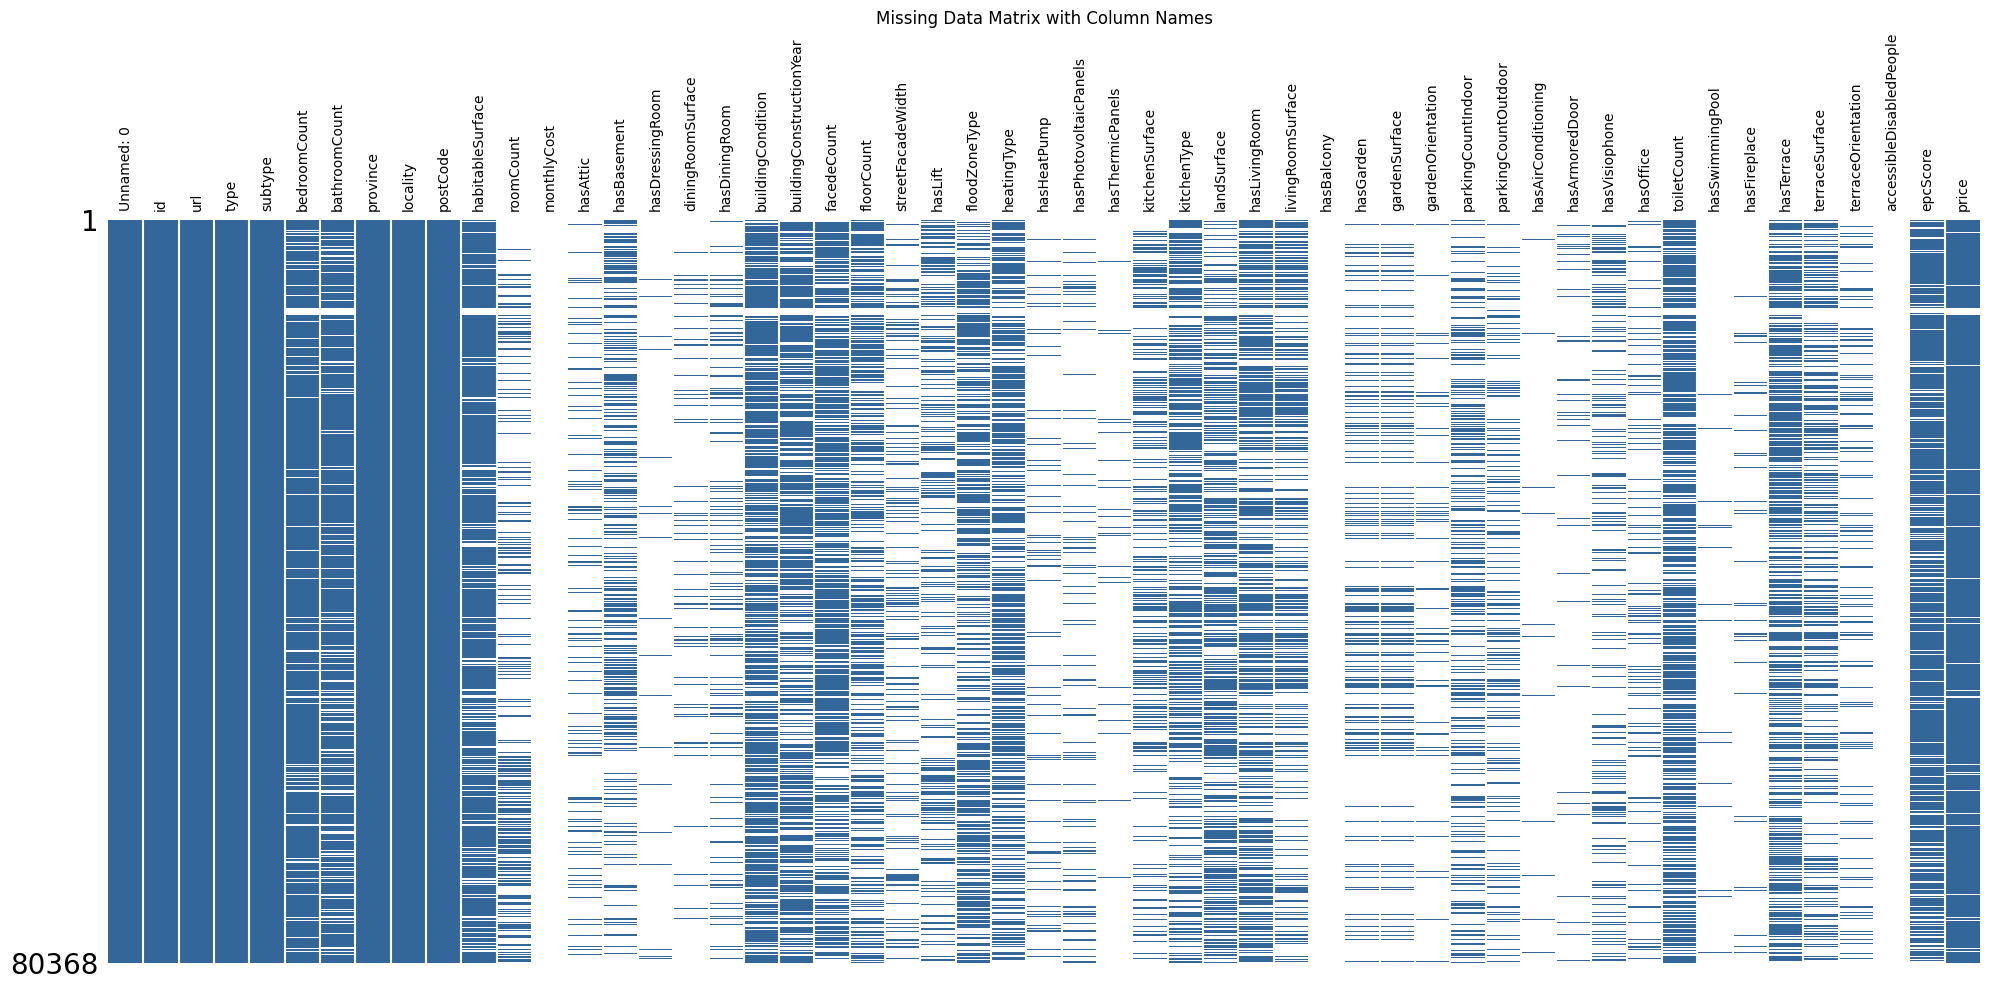

In [8]:
import missingno as msno
import matplotlib.pyplot as plt

# Plot the matrix
fig = plt.figure(figsize=(20, 10))
ax = msno.matrix(df, color=(0.2, 0.4, 0.6), figsize=(20, 10), sparkline=False)

# Manually set x-axis tick labels (only shows first ~20 by default)
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, rotation=90, fontsize=10)

plt.title("Missing Data Matrix with Column Names")
plt.tight_layout()
plt.show()

#### Approach 3 – Visualisation with missingno 

<Axes: >

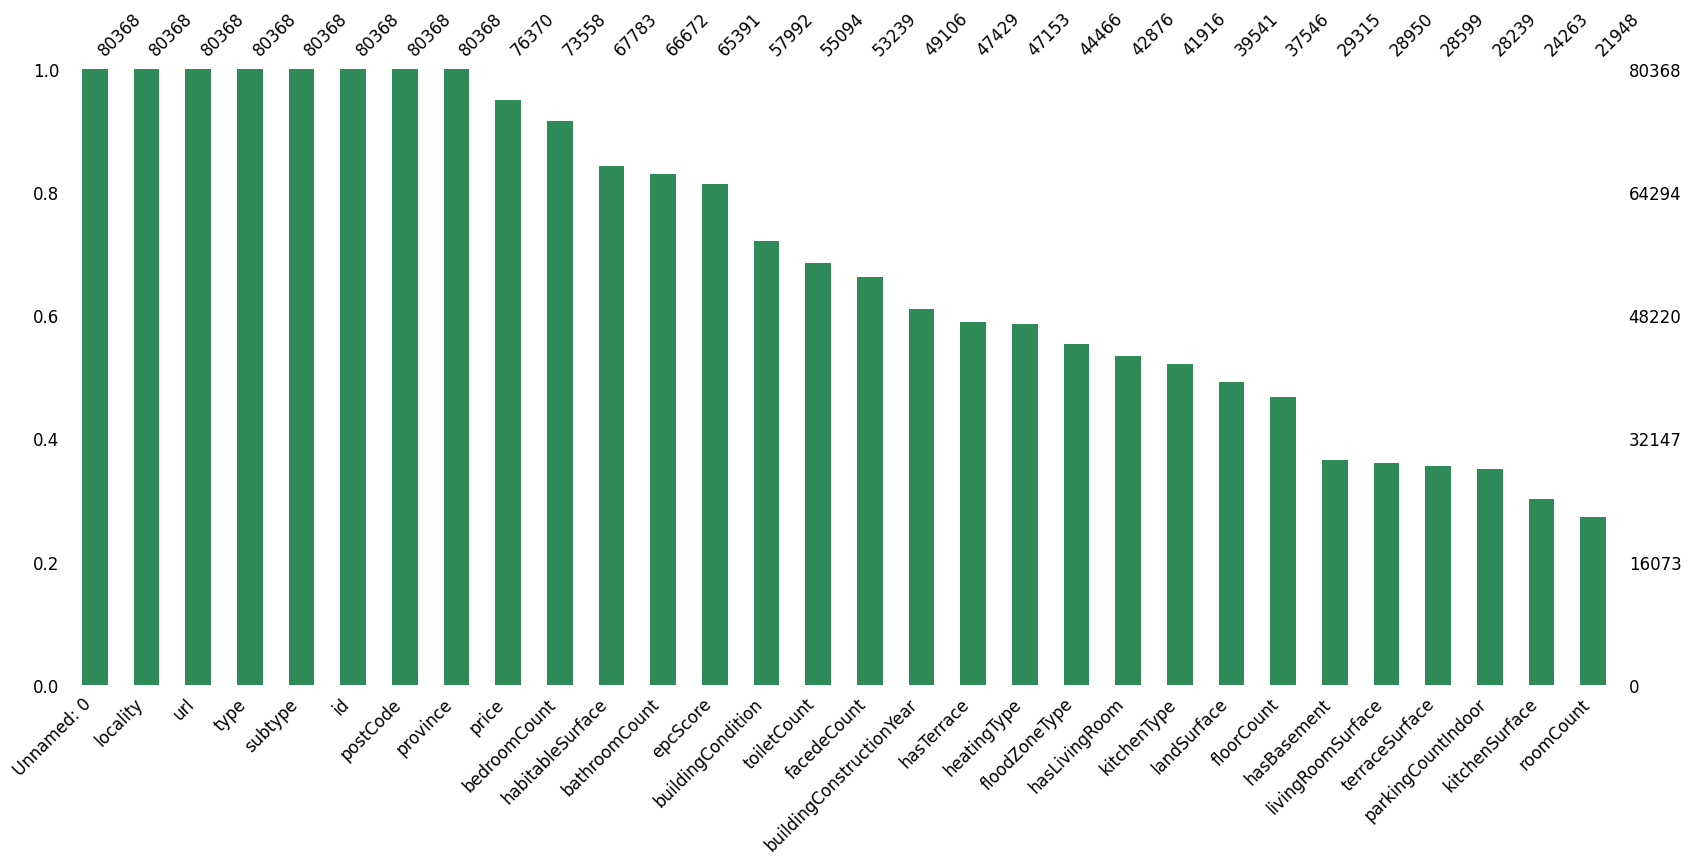

In [9]:
import missingno as msno

# Step 1 – Calculate completeness (i.e., 1 - missing rate)
completeness = 1 - df.isnull().mean()

# Step 2 – Select the 20 most complete features
top_complete_cols = completeness.sort_values(ascending=False).head(30).index

# Step 3 – Create a subset of the DataFrame with those features
df_most_complete = df[top_complete_cols]

# Step 4 – Visualize using missingno.bar (shows non-missing count per column)
msno.bar(
    df_most_complete,
    color='seagreen',        # Indicates completeness
    figsize=(20, 8),         # Adjust figure size for readability
    fontsize=12,             # Font size for axis labels
    labels=True              # Display column names
)


### Most Complete Features – Bar Chart Interpretation

The chart above displays the top 30 features with the highest data availability (i.e., the lowest percentage of missing values), sorted in descending order of completeness.

#### Key Observations:

- Several columns such as `Unnamed: 0`, `locality`, `url`, `type`, `subtype`, `id`, `postcode`, and `province` are **fully populated** (100% complete), making them highly reliable for indexing, filtering, or grouping operations.
- Core variables like `price`, `bedroomCount`, and `habitableSurface` also show near-complete coverage, confirming they are suitable for **model training and analysis without the need for imputation**.
- Columns such as `epcScore`, `buildingCondition`, `facadeCount`, `toiletCount`, and `buildingConstructionYear` are also **well-covered** (70–90%), although some may still require minimal preprocessing.
- Lower on the chart, fields like `roomCount`, `kitchenSurface`, `terraceSurface`, and `parkingCountIndoor` have **significantly more missing values** (below 60% availability) and may require imputation or cautious treatment depending on their importance.

#### Strategic Implications:

- These most complete features can serve as a **baseline** for modeling, clustering, or dashboards with minimal data preparation effort.
- The presence of both numerical and categorical features among the most complete fields offers **good diversity** for predictive modeling.
- Less complete fields at the bottom of this list should be considered **optional or secondary features** and evaluated on a case-by-case basis for inclusion.

Prioritize these high-availability columns when building early prototypes or minimal viable models to ensure robustness.


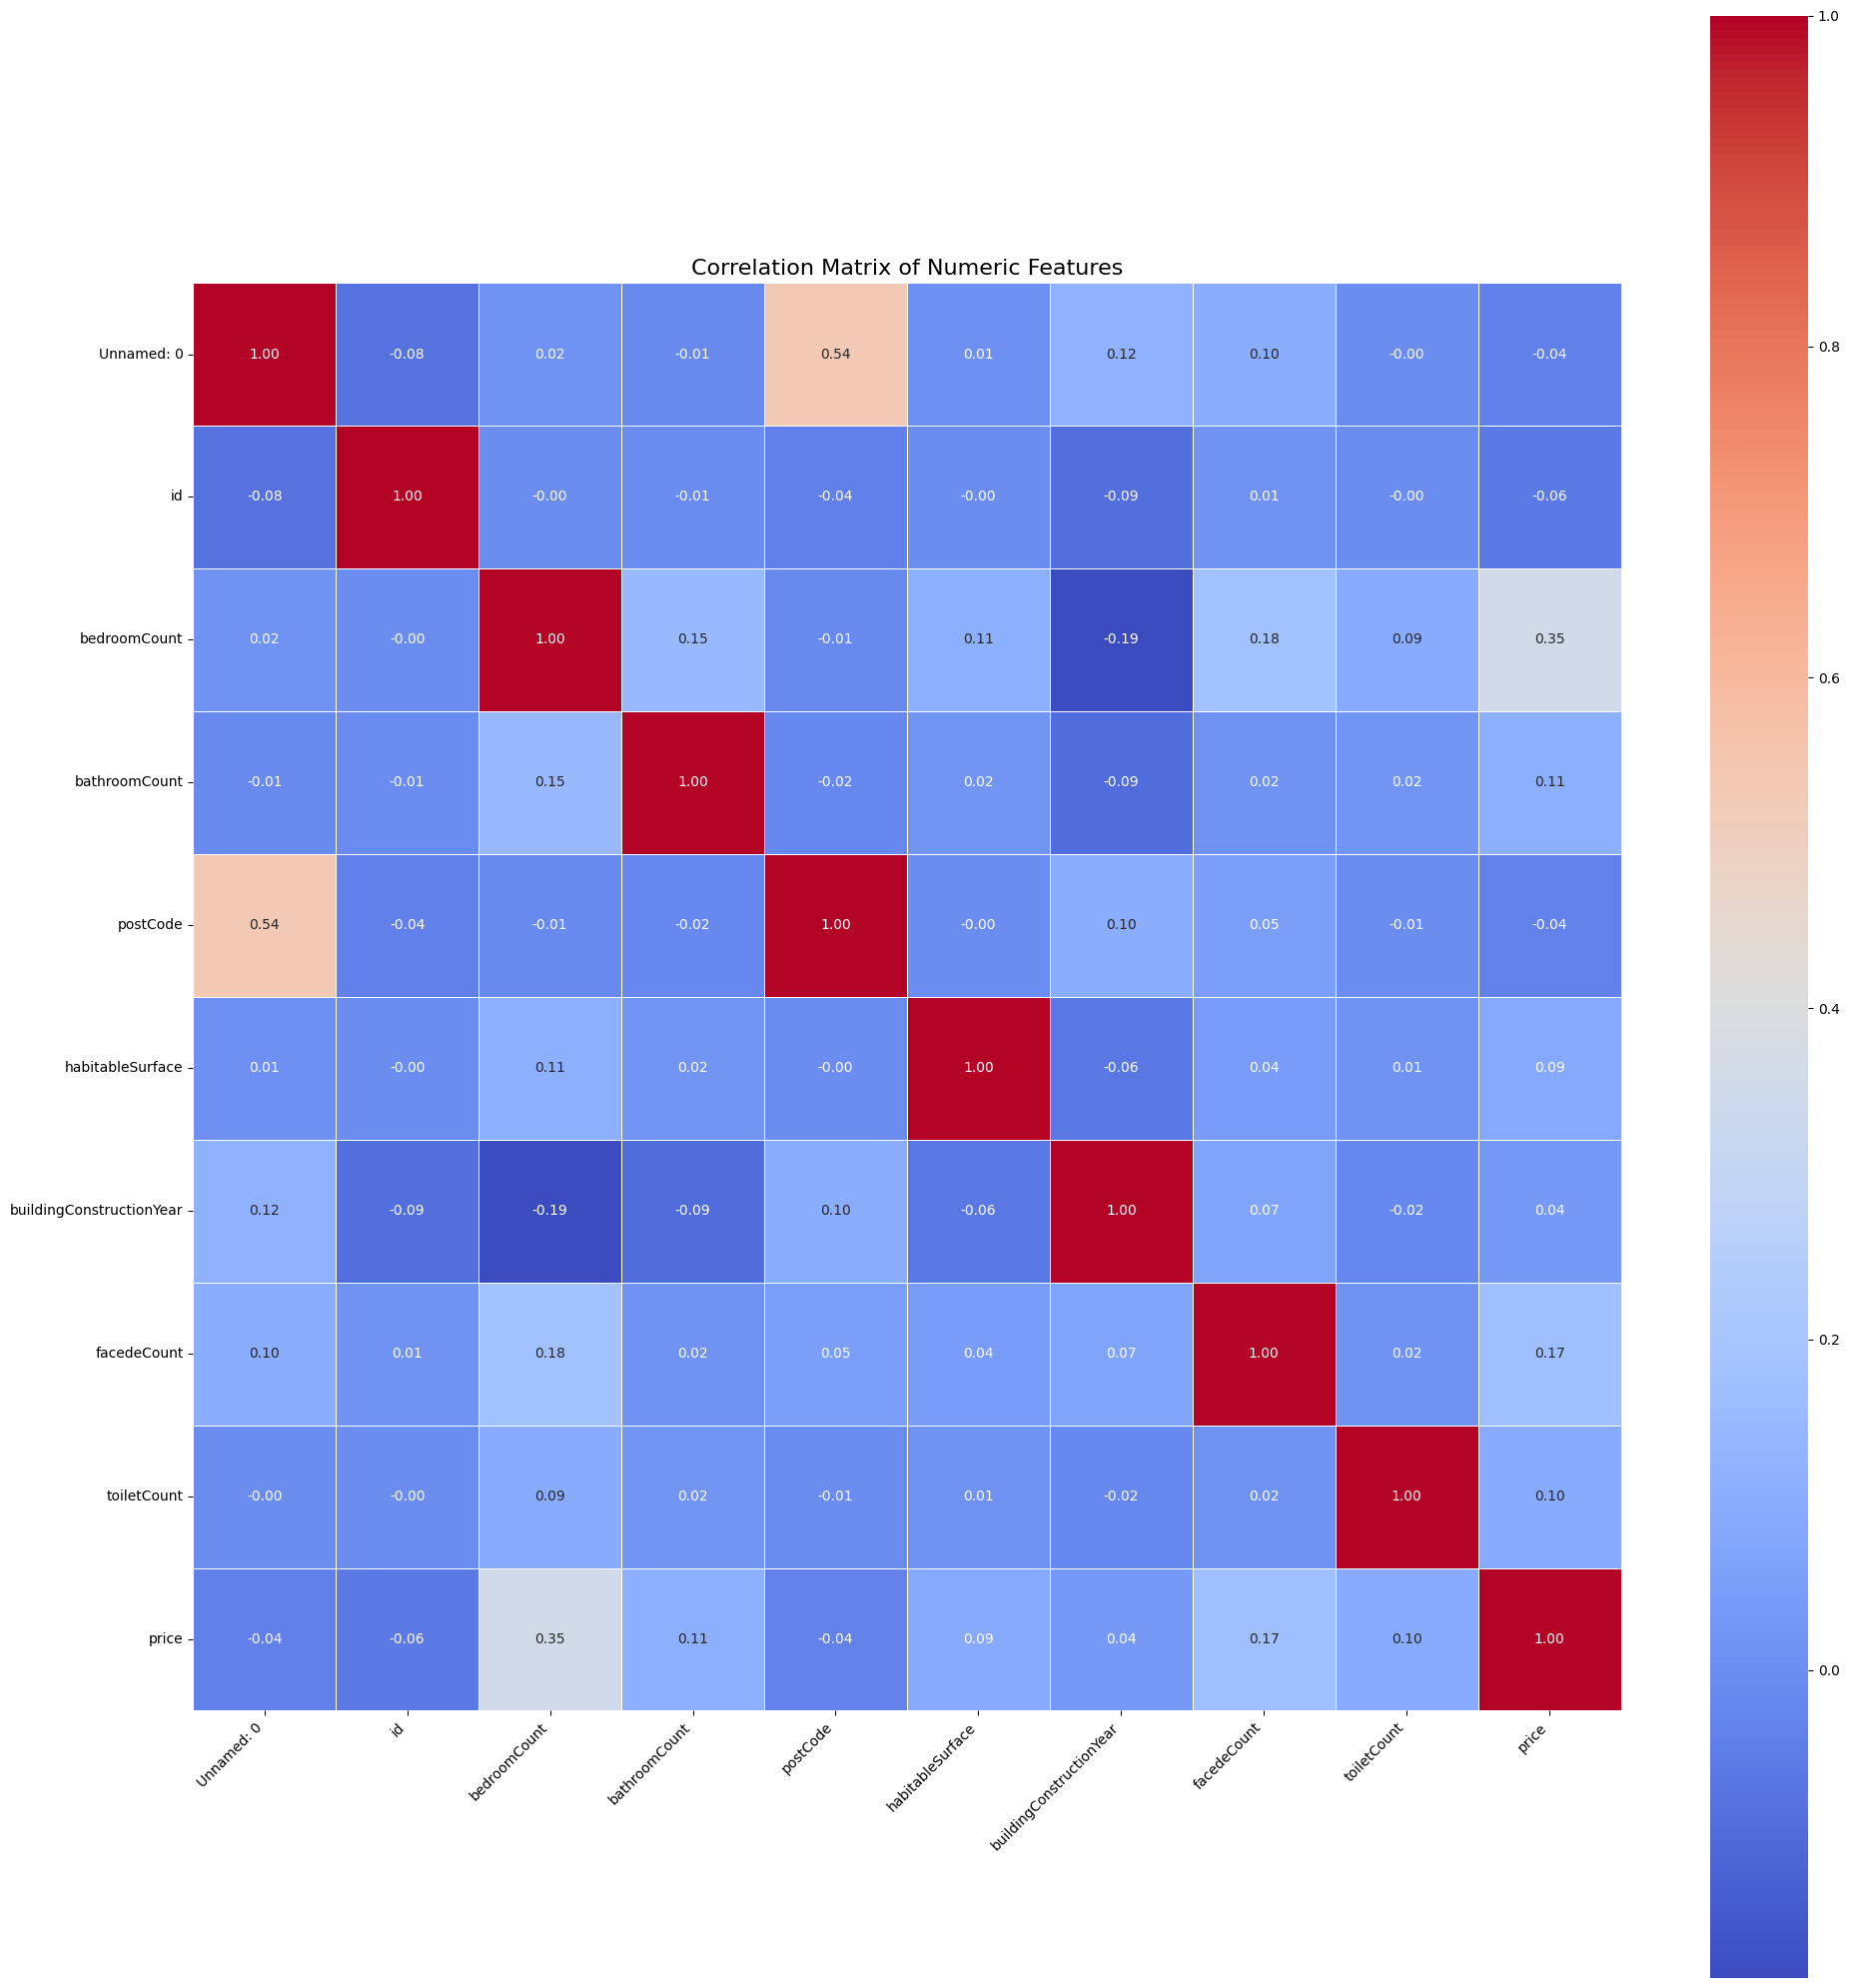

Top correlations with price:
bedroomCount                0.353765
facedeCount                 0.171758
bathroomCount               0.109083
toiletCount                 0.095149
habitableSurface            0.088111
buildingConstructionYear    0.035622
postCode                   -0.037531
Unnamed: 0                 -0.042194
id                         -0.057253
Name: price, dtype: float64


C:\Users\Neo\AppData\Local\Temp\ipykernel_11428\3515408278.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_corr.values, y=price_corr.index, palette="coolwarm")


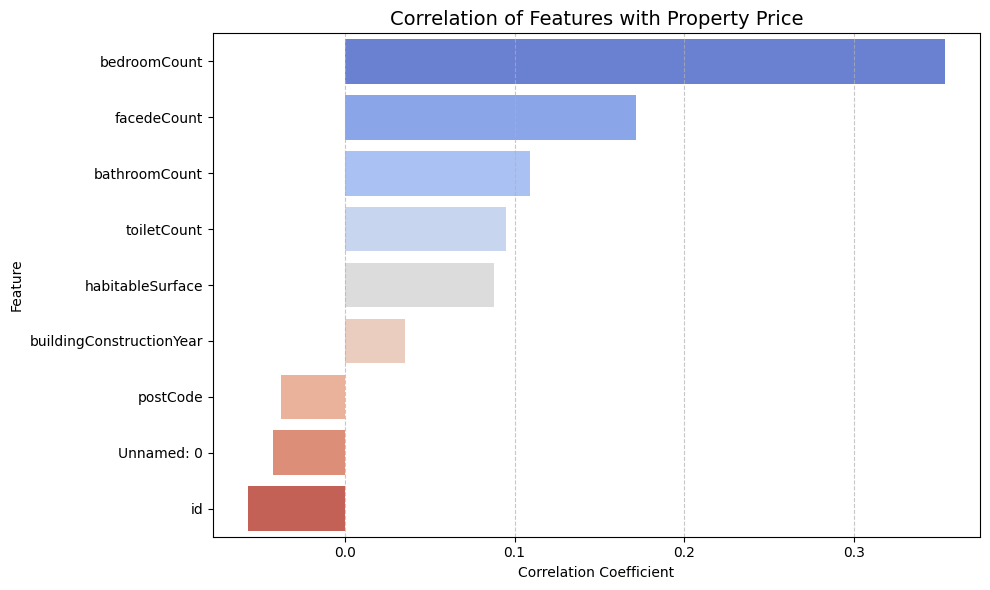

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("../data/immoweb_real_estate_cleaned_dataset.csv")

# Compute the correlation matrix (only numeric features will be considered)
corr_matrix = df.corr(numeric_only=True)

# Set the plot size and style
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Get correlation of all numeric features with 'price', sorted by strength
price_corr = corr_matrix["price"].drop("price").sort_values(ascending=False)

# Display the top positively and negatively correlated features
print("Top correlations with price:")
print(price_corr)

plt.figure(figsize=(10, 6))
sns.barplot(x=price_corr.values, y=price_corr.index, palette="coolwarm")
plt.title("Correlation of Features with Property Price", fontsize=14)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

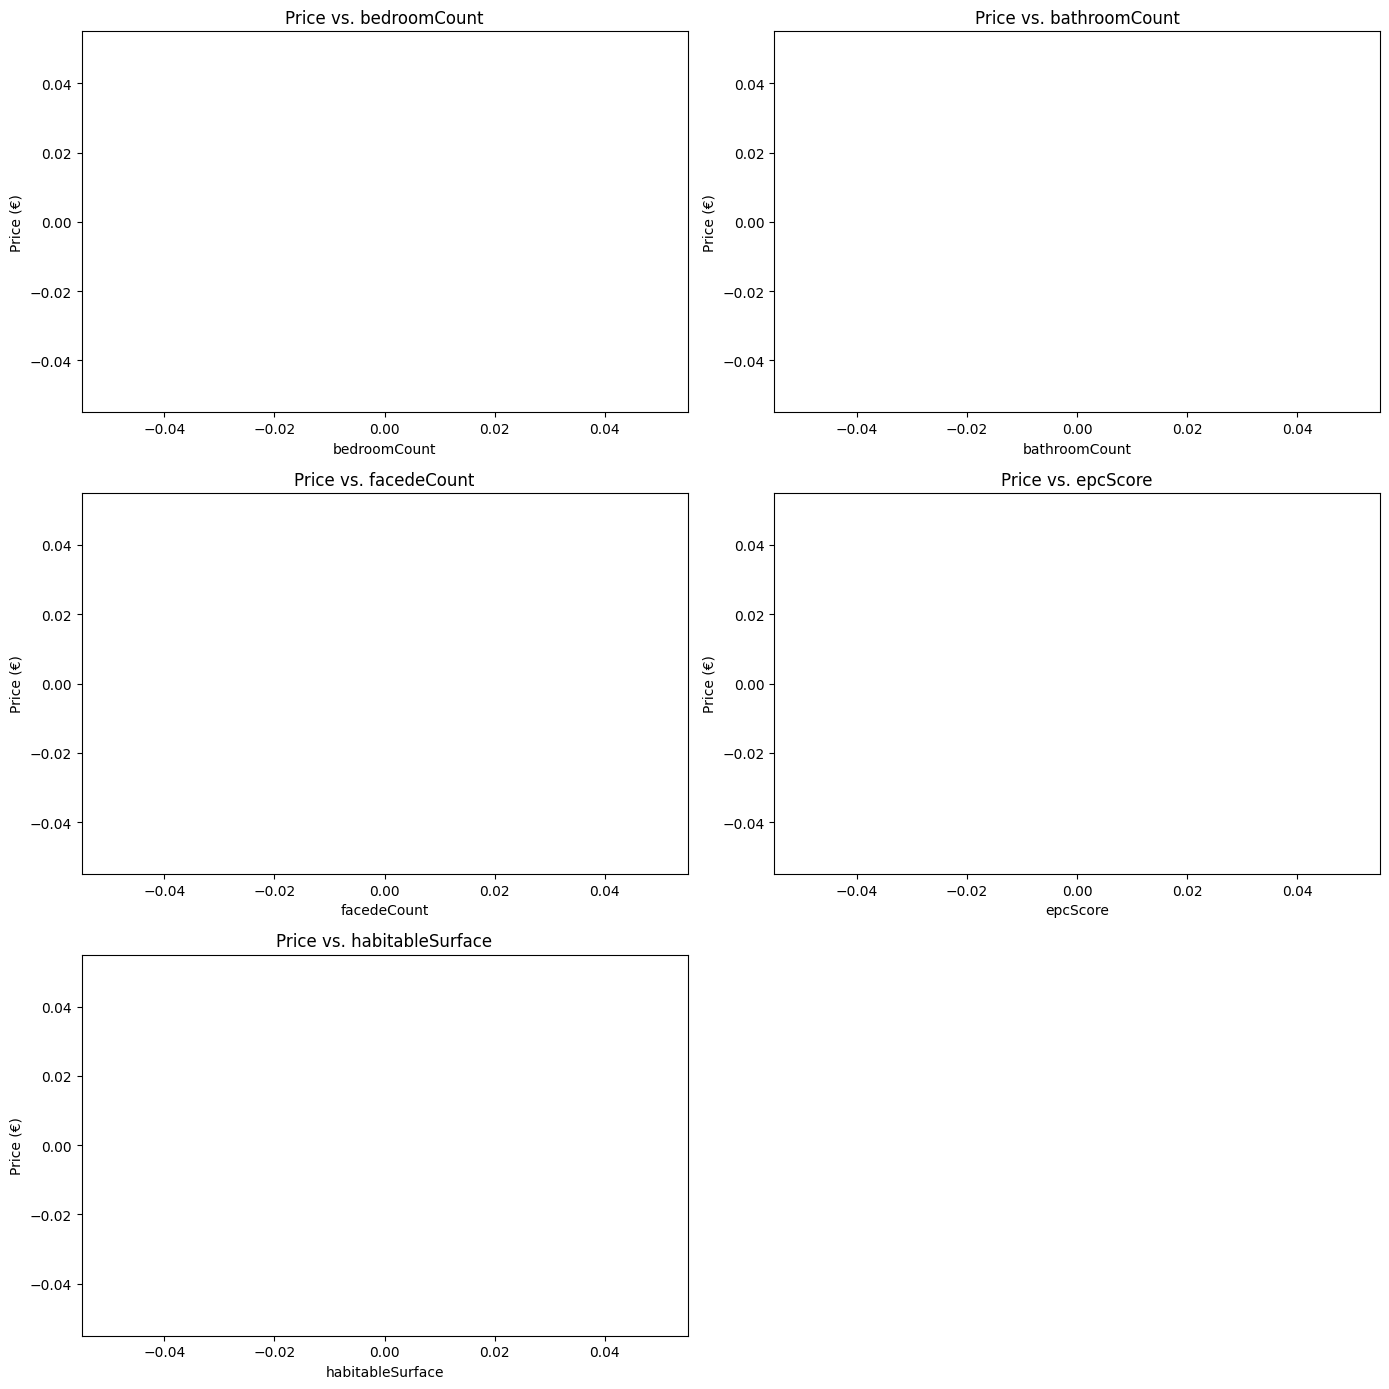

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("../data/immoweb_real_estate_cleaned_dataset.csv")
df.columns = df.columns.str.strip()

# Features to compare with price
features = ["bedroomCount", "bathroomCount", "facedeCount", "epcScore", "habitableSurface"]

# Convert to numeric and drop missing values
df = df[["price"] + features].apply(pd.to_numeric, errors="coerce").dropna()

# Generate scatterplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 14))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(data=df, x=feature, y="price", alpha=0.5, ax=axes[i])
    axes[i].set_title(f"Price vs. {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Price (€)")

# Hide any unused subplot (if odd number)
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Step 2 – Data Analysis

### 2.1. Save new dataset with missing values removed (count how many rows and columns are in the dataset)
  - A. Drop columns with more than 50% missing values
  - B. Drop remaining rows with any missing value

In [11]:
# === Load dataset ===
df = pd.read_csv("../data/immoweb_real_estate.csv")


missing_threshold = 0.5

# Nombre total de colonnes avant nettoyage
initial_col_count = df.shape[1]

# Identifier les colonnes à supprimer
cols_to_drop = df.columns[df.isnull().mean() > missing_threshold]
dropped_col_count = len(cols_to_drop)

# Appliquer la suppression
df_cleaned = df.drop(columns=cols_to_drop)

# Nombre de colonnes restantes
remaining_col_count = df_cleaned.shape[1]

# Affichage du résumé
print("\n=== Column Cleaning Summary ===")
print(f"Initial number of columns: {initial_col_count}")
print(f"Number of columns dropped (>50% missing): {dropped_col_count}")
print(f"Remaining columns: {remaining_col_count}")

print("\nColumns dropped:")
for col in cols_to_drop:
    print(f"  • {col}")


# === Step 2 – Keep only rows with at least 70% non-missing values ===
min_required = int(df_cleaned.shape[1] * 0.7)  # Minimum number of non-null values per row
before_shape = df_cleaned.shape

df_cleaned = df_cleaned.dropna(thresh=min_required)

after_shape = df_cleaned.shape

# === Summary ===
print("\n=== Row Cleaning Summary ===")
print(f"Threshold: keep rows with ≥70% non-missing values (at least {min_required} non-null columns)")
print(f"Rows before cleaning: {before_shape[0]}")
print(f"Rows after cleaning: {after_shape[0]}")
print(f"Rows removed: {before_shape[0] - after_shape[0]}")

# === Export cleaned dataset ===
df_cleaned.to_csv("../data/immoweb_real_estate_cleaned_dataset.csv", index=False)
print("Cleaned dataset saved to: '../data/immoweb_real_estate_cleaned_dataset.csv'")


=== Column Cleaning Summary ===
Initial number of columns: 53
Number of columns dropped (>50% missing): 31
Remaining columns: 22

Columns dropped:
  • roomCount
  • monthlyCost
  • hasAttic
  • hasBasement
  • hasDressingRoom
  • diningRoomSurface
  • hasDiningRoom
  • floorCount
  • streetFacadeWidth
  • hasLift
  • hasHeatPump
  • hasPhotovoltaicPanels
  • hasThermicPanels
  • kitchenSurface
  • landSurface
  • livingRoomSurface
  • hasBalcony
  • hasGarden
  • gardenSurface
  • gardenOrientation
  • parkingCountIndoor
  • parkingCountOutdoor
  • hasAirConditioning
  • hasArmoredDoor
  • hasVisiophone
  • hasOffice
  • hasSwimmingPool
  • hasFireplace
  • terraceSurface
  • terraceOrientation
  • accessibleDisabledPeople

=== Row Cleaning Summary ===
Threshold: keep rows with ≥70% non-missing values (at least 15 non-null columns)
Rows before cleaning: 80368
Rows after cleaning: 70125
Rows removed: 10243
Cleaned dataset saved to: '../data/immoweb_real_estate_cleaned_dataset.csv'


## 2.2 What is the correlation between variables and the price?  


### 2.2.1 Pearson correlation 

Top correlations with price:
bedroomCount                0.377437
terraceSurface              0.236967
landSurface                 0.226146
facedeCount                 0.167203
bathroomCount               0.111059
gardenSurface               0.099387
habitableSurface            0.097872
toiletCount                 0.095787
roomCount                   0.088276
diningRoomSurface           0.077485
postCode                   -0.042046
buildingConstructionYear    0.032558
livingRoomSurface           0.031861
kitchenSurface              0.021199
streetFacadeWidth           0.009624
parkingCountOutdoor         0.008926
parkingCountIndoor         -0.002719
floorCount                 -0.001798
monthlyCost                      NaN
hasBalcony                       NaN
accessibleDisabledPeople         NaN
Name: price, dtype: float64


C:\Users\Neo\AppData\Local\Temp\ipykernel_26108\1356974945.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_corr.values, y=price_corr.index, palette="coolwarm")


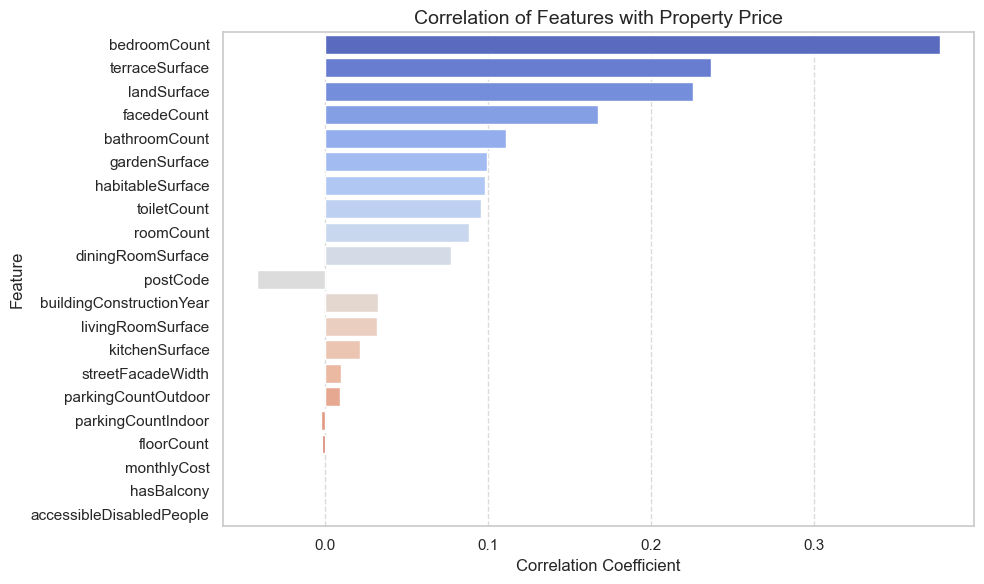

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix (only numeric)
corr_matrix = df.corr(numeric_only=True)

# Drop technical columns from the matrix
columns_to_exclude = ['id', 'Unnamed: 0']
filtered_corr = corr_matrix.drop(index=columns_to_exclude, columns=columns_to_exclude, errors='ignore')

# Extract correlations with price and drop price itself
price_corr = filtered_corr['price'].drop('price', errors='ignore').sort_values(key=lambda x: abs(x), ascending=False)

# Display top correlations
print("Top correlations with price:")
print(price_corr)

# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=price_corr.values, y=price_corr.index, palette="coolwarm")
plt.title("Correlation of Features with Property Price", fontsize=14)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 2.2.2 Analyse ANOVA ou Kruskal pour province vs price

ANOVA p-value: 0.000000
Kruskal-Wallis p-value: 0.000000


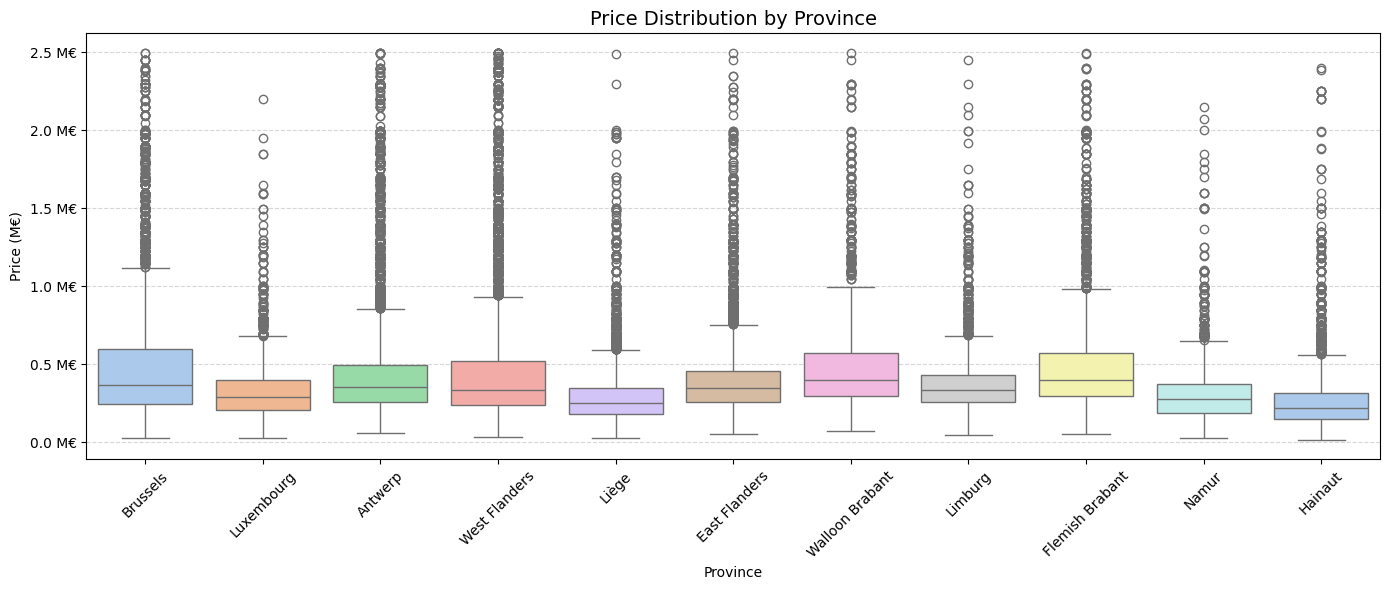

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from scipy.stats import f_oneway, kruskal

# Load the dataset
df = pd.read_csv("../data/immoweb_real_estate_cleaned_dataset.csv")

# Remove top 1% outliers on price
df = df[df['price'] < df['price'].quantile(0.99)]

# Group price values by province for statistical tests
groups = [group["price"].values for name, group in df.groupby("province")]

# Run ANOVA and Kruskal-Wallis tests
anova_result = f_oneway(*groups)
kruskal_result = kruskal(*groups)

# Display p-values with high precision
print(f"ANOVA p-value: {anova_result.pvalue:.6f}")
print(f"Kruskal-Wallis p-value: {kruskal_result.pvalue:.6f}")

# Create the boxplot with hue fix
plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=df, x='province', y='price', hue='province', palette="pastel", legend=False)
plt.title("Price Distribution by Province", fontsize=14)
plt.xlabel("Province")
plt.ylabel("Price (M€)")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x / 1_000_000:.1f} M€"))
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 2.2 C Binary Categorical Variables

e:\_SoftEng\_BeCode\real-estate-price-predictor\.venv\Lib\site-packages\scipy\stats\_stats_py.py:5534: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)


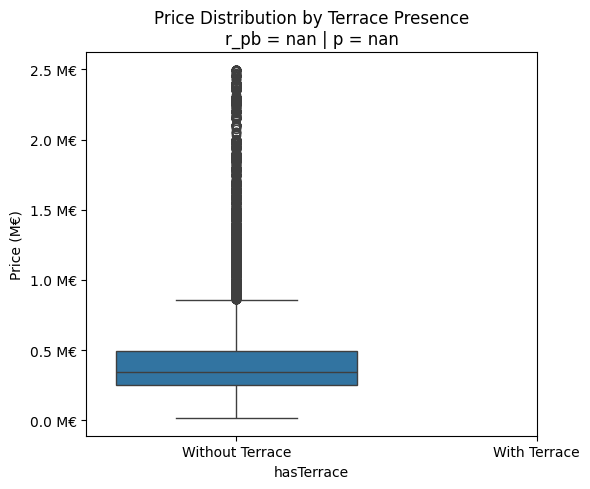

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
import matplotlib.ticker as mtick  # Pour afficher l'axe Y en M€

# Load dataset
df = pd.read_csv("../data/immoweb_real_estate_cleaned_dataset.csv")

# Filter extreme values
df = df[df['price'] < df['price'].quantile(0.99)]

# Keep only rows where hasTerrace is not null and convert to integer
df = df[df['hasTerrace'].notna()]
df['hasTerrace'] = df['hasTerrace'].astype(int)

# Compute Point-Biserial Correlation
corr, p_value = pointbiserialr(df['hasTerrace'], df['price'])

# Plot
plt.figure(figsize=(6, 5))
sns.boxplot(x='hasTerrace', y='price', data=df)
plt.xticks([0, 1], ['Without Terrace', 'With Terrace'])
plt.ylabel('Price (M€)')
plt.title(f'Price Distribution by Terrace Presence\n'
          f'r_pb = {corr:.3f} | p = {p_value:.3e}')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f} M€'))
plt.tight_layout()
plt.show()


## 2.3 Why might those variables be correlated?
Interpretation
Variables such as surface area and number of bedrooms are logically related to price, as larger or more equipped properties tend to cost more.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement du dataset complet
df = pd.read_csv("../data/immoweb_real_estate_cleaned_dataset.csv")

# Nettoyage des noms de colonnes (espaces parasites)
df.columns = df.columns.str.strip()

# Colonnes numériques à analyser
numeric_cols = [
    "price", "habitableSurface", "bedroomCount", "bathroomCount",
    "toiletCount", "facedeCount", "epcScore"
]

# Filtrer uniquement les colonnes valides présentes dans le fichier
valid_cols = [col for col in numeric_cols if col in df.columns]

# Convertir en numérique (si certains champs contiennent du texte ou des valeurs erronées)
df_numeric = df[valid_cols].apply(pd.to_numeric, errors="coerce")

# Afficher taux de valeurs manquantes (utile pour debugging)
print("\nPourcentage de valeurs manquantes :")
print(df_numeric.isna().mean().sort_values(ascending=False))

# Supprimer les lignes incomplètes
df_numeric = df_numeric.dropna()

# Supprimer les colonnes constantes (écart-type nul)
stds = df_numeric.std()
non_constant_cols = stds[stds > 0].index.tolist()
df_numeric = df_numeric[non_constant_cols]

# Vérification finale
if df_numeric.empty or df_numeric.shape[1] < 2:
    print("\n Aucune colonne exploitable pour générer une matrice de corrélation.")
else:
    print("\n Statistiques descriptives :\n")
    print(df_numeric.describe().T)

    # Heatmap des corrélations
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
    plt.title("Correlation Matrix of Real Estate Variables")
    plt.tight_layout()
    plt.show()



🔍 Pourcentage de valeurs manquantes :
epcScore            1.000000
facedeCount         0.272157
toiletCount         0.225512
bathroomCount       0.082253
habitableSurface    0.079957
bedroomCount        0.021718
price               0.000057
dtype: float64

❌ Aucune colonne exploitable pour générer une matrice de corrélation.


# 3. Exploratory data analysis (EDA) 
- 3.1. Variable Types: Quantitative vs Qualitative
- 3.2. Descriptive Statistics (Mean, Median, etc.)
- 3.3. Distribution Visualizations
  - Histograms
  - Boxplots
- 3.4. Correlation Matrix & Heatmap
- 3.5. Outlier Detection

## 3.1. Identify variable types in the cleaned dataset
- **Quantitative variables** are numerical and can be used in mathematical operations, plots, and statistical summaries.
- **Qualitative variables** (also called categorical) describe categories or labels and often require encoding or grouping before use in machine learning.


In [12]:
# Separate columns by dtype
quantitative_cols = df_cleaned.select_dtypes(include=["int64", "float64"]).columns.tolist()
qualitative_cols = df_cleaned.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("Quantitative variables (numerical):")
print(quantitative_cols)

print("\nQualitative variables (categorical):")
print(qualitative_cols)

Quantitative variables (numerical):
['Unnamed: 0', 'id', 'bedroomCount', 'bathroomCount', 'postCode', 'habitableSurface', 'buildingConstructionYear', 'facedeCount', 'toiletCount', 'price']

Qualitative variables (categorical):
['url', 'type', 'subtype', 'province', 'locality', 'buildingCondition', 'floodZoneType', 'heatingType', 'kitchenType', 'hasLivingRoom', 'hasTerrace', 'epcScore']


## 3.2. Descriptive Statistics for Quantitative Variables

In [13]:
# Identify quantitative columns
quantitative_cols = df_cleaned.select_dtypes(include=["int64", "float64"]).columns

# Compute descriptive statistics
desc_stats = df_cleaned[quantitative_cols].describe().T

# Add median separately
desc_stats["median"] = df_cleaned[quantitative_cols].median()

# Round for readability
desc_stats = desc_stats.round(2)

# Display
display(desc_stats)

,count,mean,std,min,25%,50%,75%,max,median
Unnamed: 0,70125.0,207851.28,105816.86,0.0,181320.0,234162.0,256347.0,446550.0,234162.0
id,70125.0,19730305.71,2611911.39,1882546.0,20380882.0,20537728.0,20617840.0,20664387.0,20537728.0
bedroomCount,68602.0,3.01,1.72,1.0,2.0,3.0,4.0,100.0,3.0
bathroomCount,64357.0,1.43,4.63,1.0,1.0,1.0,2.0,1146.0,1.0
postCode,70125.0,5178.97,3048.11,1000.0,2288.0,4624.0,8400.0,9992.0,4624.0
habitableSurface,64518.0,177.27,836.91,6.0,94.0,140.0,200.0,185347.0,140.0
buildingConstructionYear,47867.0,1977.81,41.40,1753.0,1957.0,1979.0,2016.0,2055.0,1979.0
facedeCount,51040.0,2.82,0.94,1.0,2.0,3.0,4.0,86.0,3.0
toiletCount,54311.0,1.80,8.47,1.0,1.0,2.0,2.0,1958.0,2.0
price,70121.0,450202.20,510952.33,14999.0,235000.0,330000.0,480000.0,15000000.0,330000.0


### Option -  Distribution Visualizations
  - Histograms
  - Boxplots

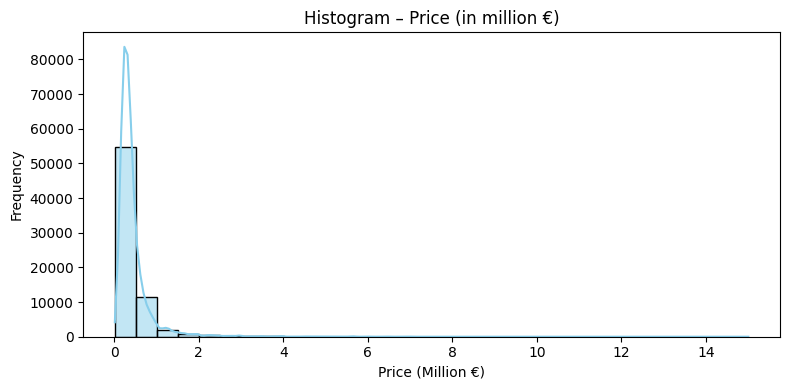

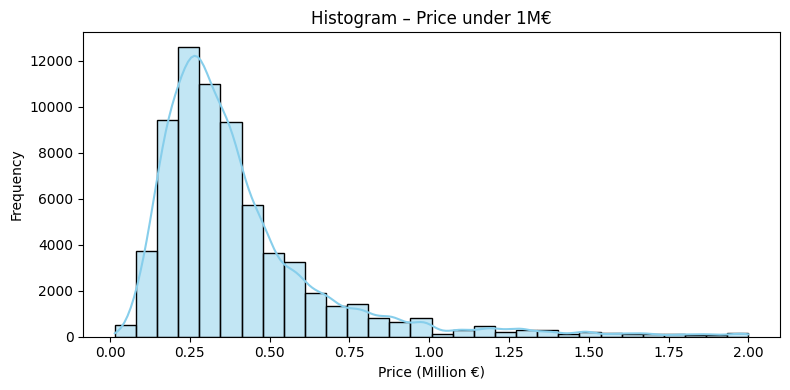

In [14]:

# Copie temporaire pour transformation
df_temp = df_cleaned.copy()

# Convert 'price' to millions of euros
df_temp["price_million"] = df_temp["price"] / 1e6

# Histogram for all prices
plt.figure(figsize=(8, 4))
sns.histplot(df_temp["price_million"], kde=True, bins=30, color="skyblue")
plt.title("Histogram – Price (in million €)")
plt.xlabel("Price (Million €)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Filter for prices < 1 million €
df_under_1m = df_temp[df_temp["price"] < 2_000_000]

# Histogram for prices < 1M€
plt.figure(figsize=(8, 4))
sns.histplot(df_under_1m["price_million"], kde=True, bins=30, color="skyblue")
plt.title("Histogram – Price under 1M€")
plt.xlabel("Price (Million €)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


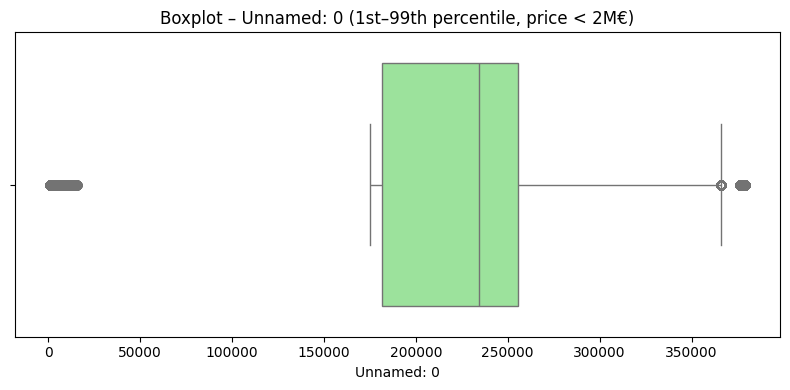

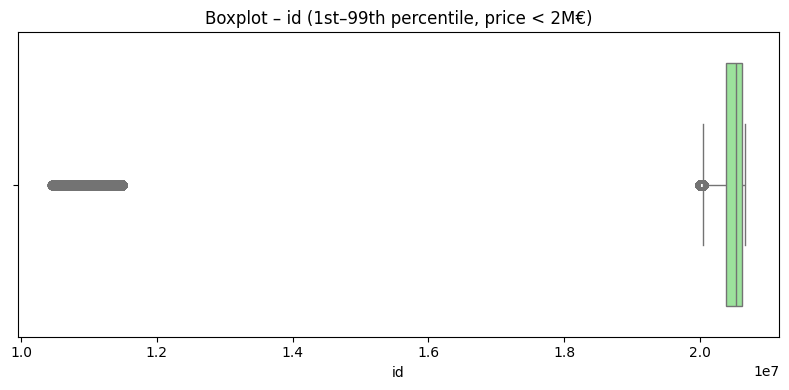

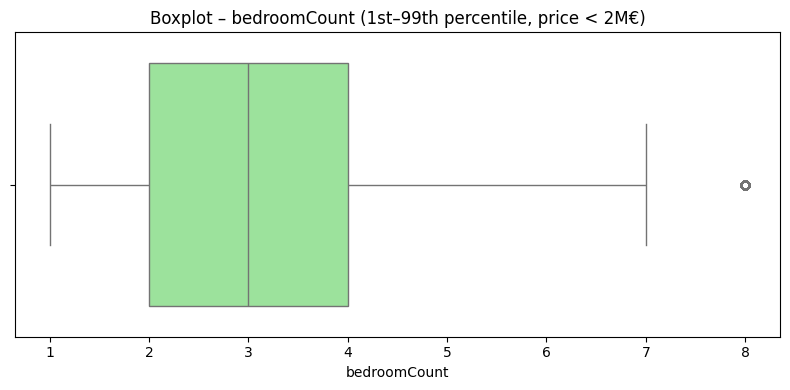

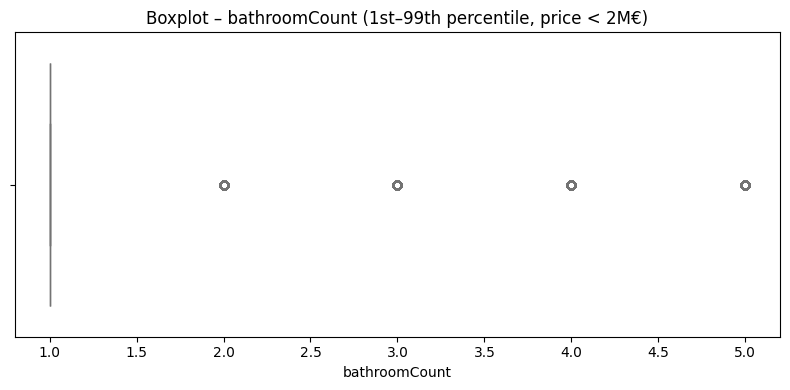

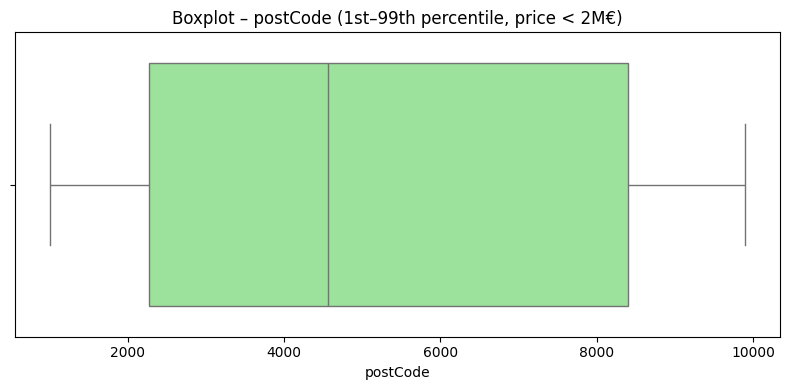

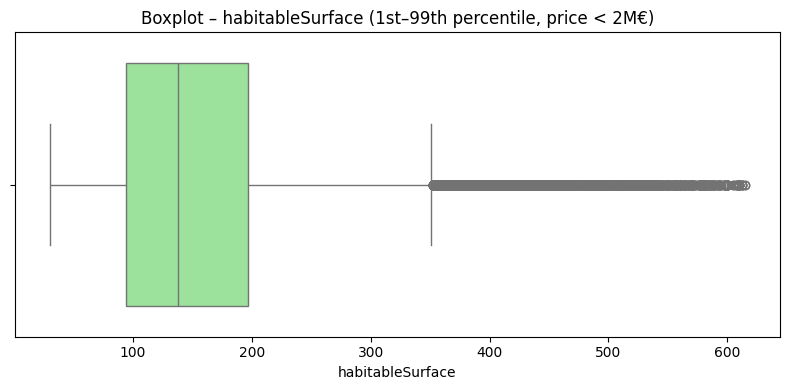

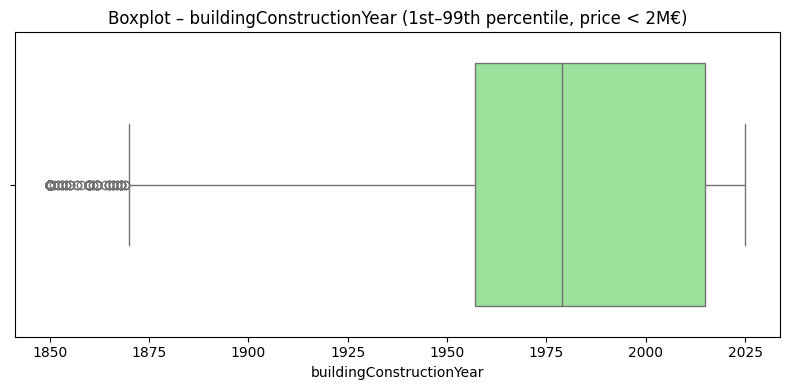

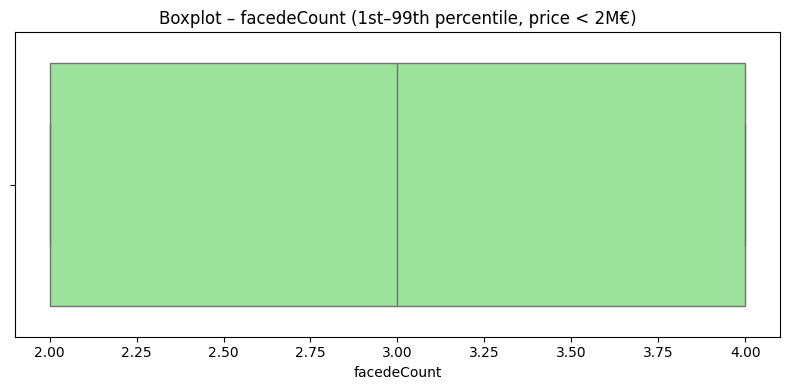

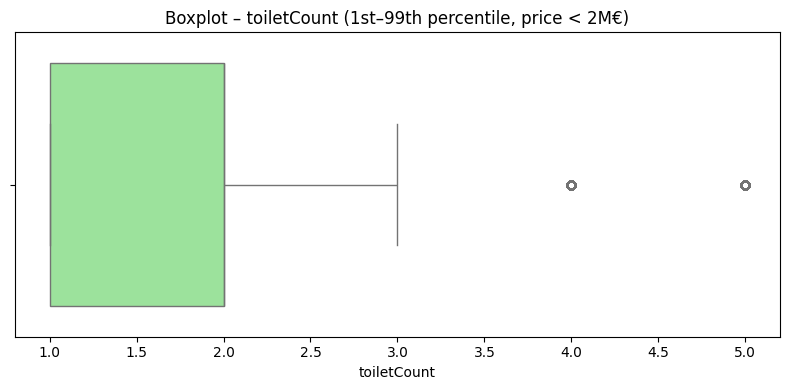

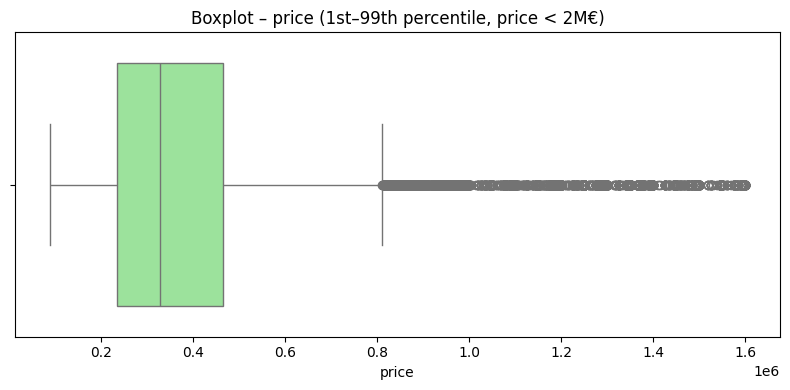

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset to include only properties priced under 2 million euros
df_filtered = df_cleaned[df_cleaned["price"] < 2_000_000]

# Identify numerical (quantitative) variables
quantitative_cols = df_filtered.select_dtypes(include=["int64", "float64"]).columns

# Plot boxplots for each numerical variable (trimmed to 1st–99th percentile)
for col in quantitative_cols:
    # Skip if the column has too few unique values (not meaningful)
    if df_filtered[col].nunique() <= 1:
        continue

    # Compute the 1st and 99th percentiles
    lower = df_filtered[col].quantile(0.01)
    upper = df_filtered[col].quantile(0.99)

    # Trim values to reduce influence of extreme outliers
    df_trimmed = df_filtered[(df_filtered[col] >= lower) & (df_filtered[col] <= upper)]

    # Skip if trimming results in empty or constant data
    if df_trimmed[col].nunique() <= 1:
        continue

    # Plot the boxplot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_trimmed[col], color="lightgreen")
    plt.title(f"Boxplot – {col} (1st–99th percentile, price < 2M€)")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


# Step3: Data interpretation
3.1 Plot the outliers (visually detect anomalies)  
3.2 Which variables would you delete and why?  
3.3 Create a histogram showing the number of properties by surface area  
3.4 In your opinion, which 5 variables are the most important and why?  
3.5 What are the most expensive municipalities in Belgium? (average price, median price, price per m<sup>2</sup>)  
3.6 What are the most expensive municipalities in Wallonia?  
3.7 What are the most expensive municipalities in Flanders?  
3.8 What are the least expensive municipalities in Belgium?  
3.9 What are the least expensive municipalities in Wallonia?  
3.10 What are the least expensive municipalities in Flanders?


# 3.1 Plot the outliers (visually detect anomalies)  

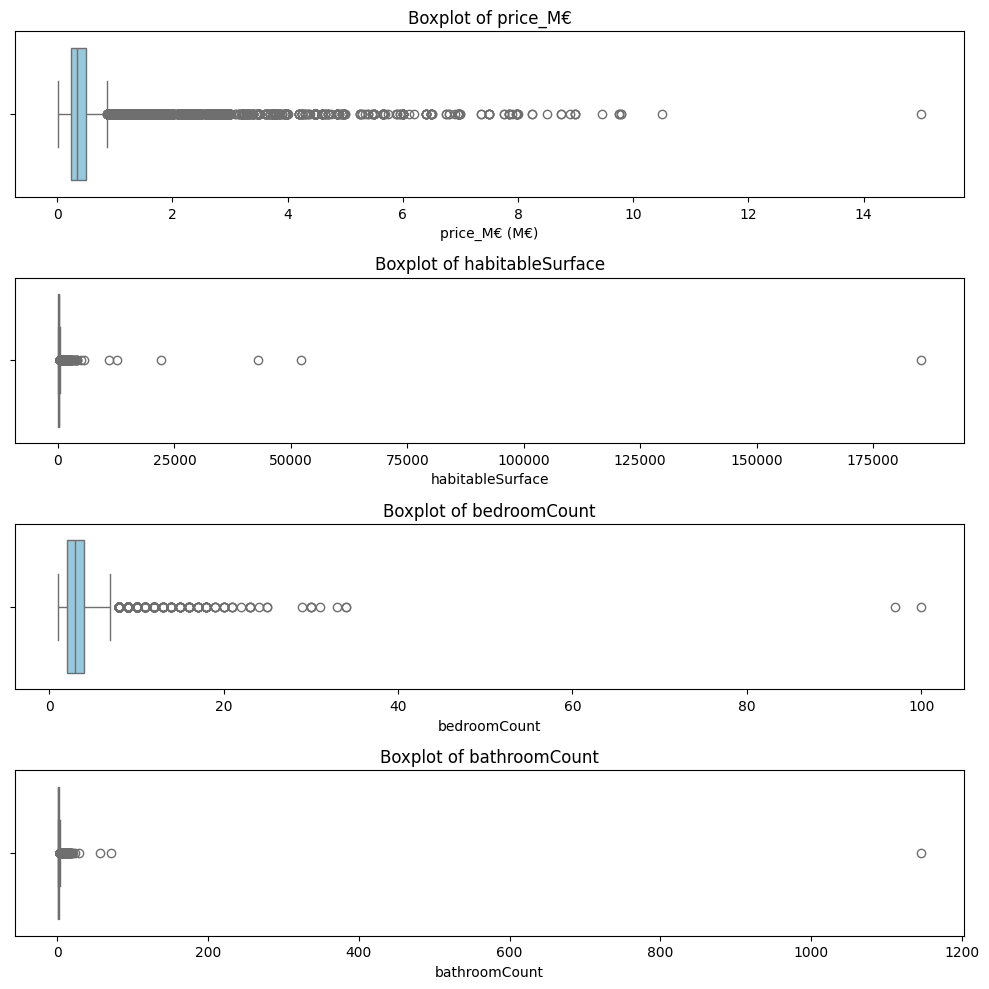

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../data/immoweb_real_estate_cleaned_dataset.csv")
df.columns = df.columns.str.strip()

# Columns to analyze
numeric_cols = [
    "price", "habitableSurface", "landSurface", "monthlyCost",
    "bedroomCount", "bathroomCount"
]
available_cols = [col for col in numeric_cols if col in df.columns]

# Clean data
df_outliers = df[available_cols].apply(pd.to_numeric, errors="coerce").dropna()

# Convert price to millions for plotting
df_outliers["price_M€"] = df_outliers["price"] / 1_000_000

# Replace 'price' with 'price_M€' in plotting list
plot_cols = ["price_M€" if col == "price" else col for col in available_cols]

# Create boxplots
fig, axes = plt.subplots(nrows=len(plot_cols), figsize=(10, 2.5 * len(plot_cols)))

for i, col in enumerate(plot_cols):
    sns.boxplot(x=df_outliers[col], ax=axes[i], color="skyblue")
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel(f"{col} (M€)" if col == "price_M€" else col)

plt.tight_layout()
plt.show()


## 3.3 Create a histogram showing the number of properties by surface area  

C:\Users\Neo\AppData\Local\Temp\ipykernel_11428\3344867049.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


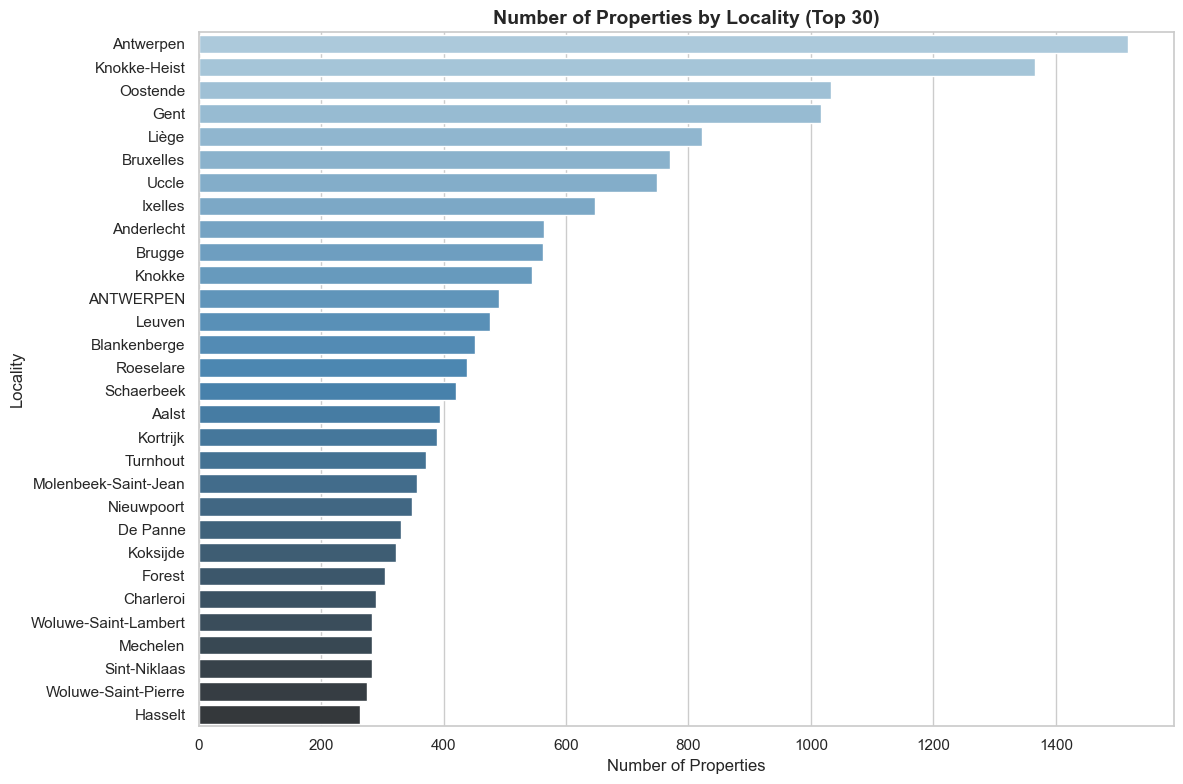

In [39]:
# Re-import required libraries after environment reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean dataset
df = pd.read_csv("../data/immoweb_real_estate_cleaned_dataset.csv")
df.columns = df.columns.str.strip()

# Step 1 – Keep only the 30 most represented localities
top_localities = df["locality"].value_counts().nlargest(30).index
df_top = df[df["locality"].isin(top_localities)]

# Step 2 – Plot barplot of number of properties per locality
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.barplot(
    y=df_top["locality"].value_counts().index,
    x=df_top["locality"].value_counts().values,
    palette="Blues_d"
)

# Add labels and title
plt.title("Number of Properties by Locality (Top 30)", fontsize=14, weight='bold')
plt.xlabel("Number of Properties", fontsize=12)
plt.ylabel("Locality", fontsize=12)

plt.tight_layout()
plt.show()


## Option Most & Least Expensive per town

C:\Users\Neo\AppData\Local\Temp\ipykernel_26108\3951217809.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


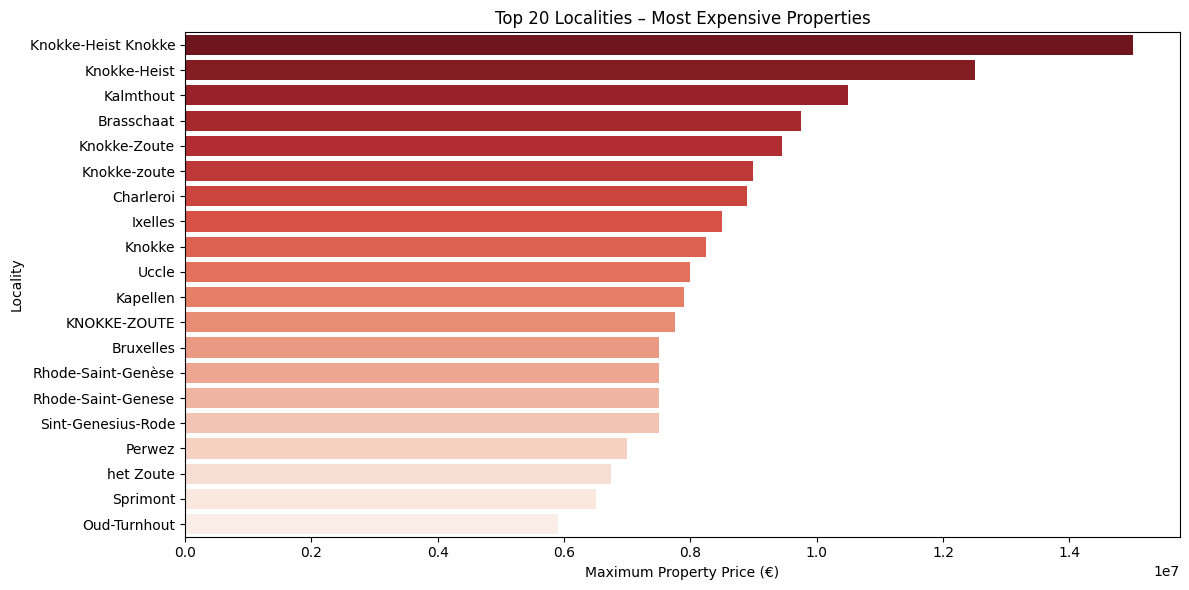

C:\Users\Neo\AppData\Local\Temp\ipykernel_26108\3951217809.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


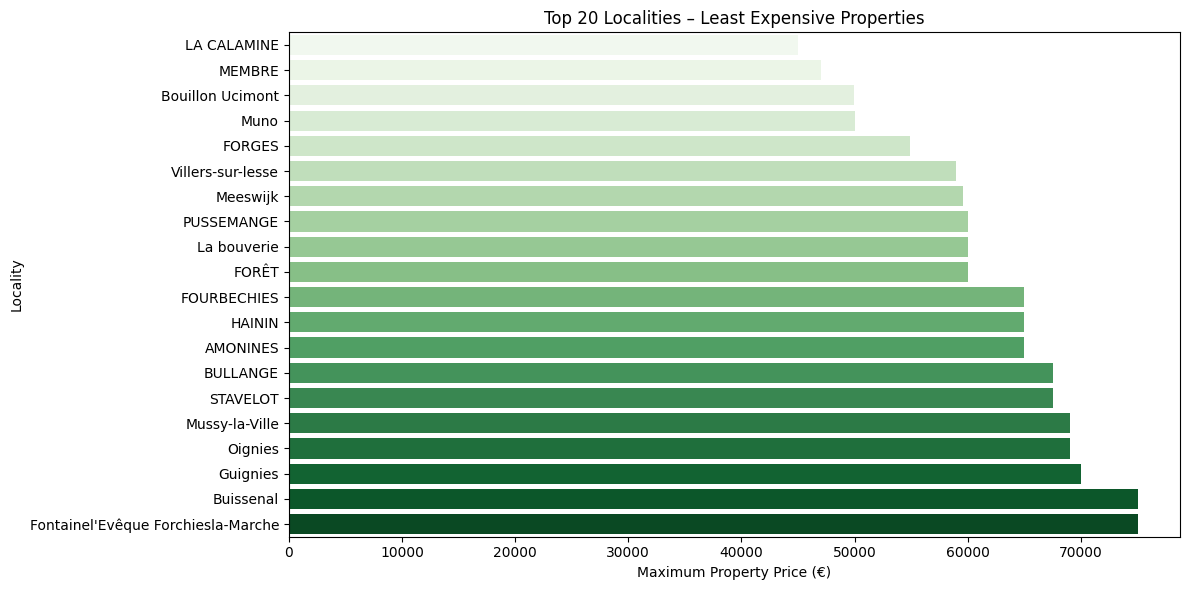

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy to avoid modifying the original DataFrame
df_cleaned = df_cleaned.copy()

# Create a new column for price per square meter
df_cleaned["price_per_m2"] = df_cleaned["price"] / df_cleaned["habitableSurface"]

# Group statistics by locality (used as a proxy for city)
city_price_stats = df_cleaned.groupby("locality").agg(
    max_price=("price", "max"),
    min_price=("price", "min"),
    avg_price=("price", "mean"),
    median_price=("price", "median"),
    avg_price_per_m2=("price_per_m2", "mean"),
    property_count=("price", "count")
).sort_values("max_price", ascending=False)

# Select the top 20 most expensive localities
top_expensive_cities = city_price_stats.head(20)

# Select the 20 least expensive localities
least_expensive_cities = city_price_stats.sort_values("max_price").head(20)

# Plot most expensive cities with unique colors per bar
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_expensive_cities,
    x="max_price",
    y=top_expensive_cities.index,
    palette=sns.color_palette("Reds_r", len(top_expensive_cities))  # red shades
)
plt.title("Top 20 Localities – Most Expensive Properties")
plt.xlabel("Maximum Property Price (€)")
plt.ylabel("Locality")
plt.tight_layout()
plt.show()

# Plot least expensive cities with unique colors per bar
plt.figure(figsize=(12, 6))
sns.barplot(
    data=least_expensive_cities,
    x="max_price",
    y=least_expensive_cities.index,
    palette=sns.color_palette("Greens", len(least_expensive_cities))  # green shades
)
plt.title("Top 20 Localities – Least Expensive Properties")
plt.xlabel("Maximum Property Price (€)")
plt.ylabel("Locality")
plt.tight_layout()
plt.show()



## Option - Distribution of Propertiy Proces by Locality

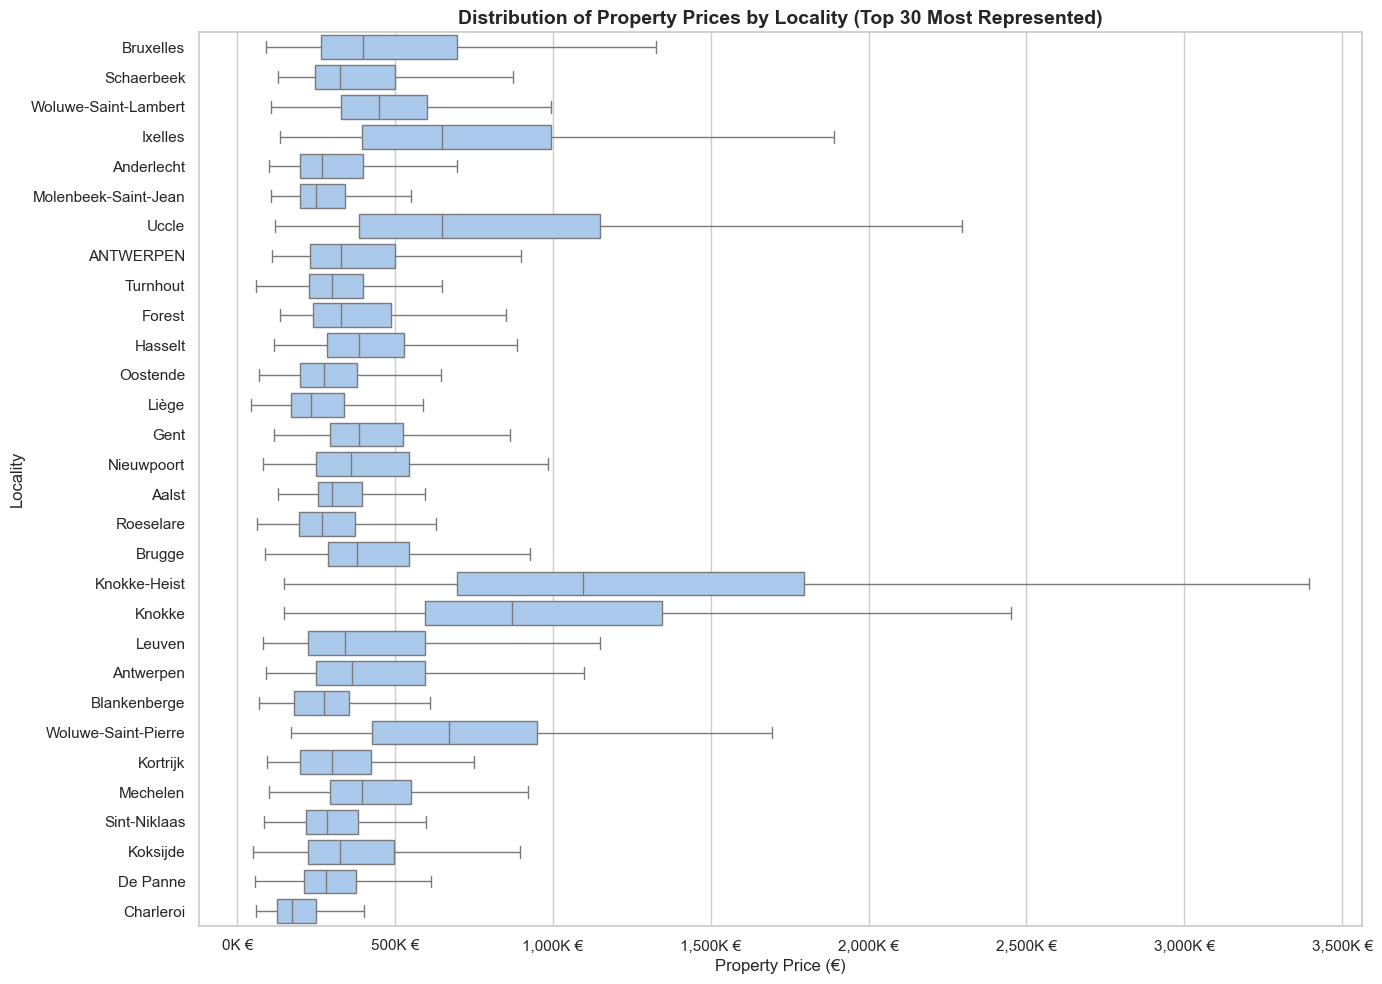

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Step 1 – Keep only the 30 most represented localities
top_localities = df_cleaned["locality"].value_counts().nlargest(30).index
df_top = df_cleaned[df_cleaned["locality"].isin(top_localities)]

# Step 2 – Plot boxplots of price distribution per locality
plt.figure(figsize=(14, 10))  # Taller to fit 30 labels
sns.set(style="whitegrid", palette="pastel")

ax = sns.boxplot(
    data=df_top,
    y="locality",
    x="price",
    orient="h",
    showfliers=False  # Remove extreme outliers for clarity
)

# Format x-axis labels as thousands in €
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x / 1000):,}K €"))

# Add labels and title
plt.title("Distribution of Property Prices by Locality (Top 30 Most Represented)", fontsize=14, weight='bold')
plt.xlabel("Property Price (€)", fontsize=12)
plt.ylabel("Locality", fontsize=12)

plt.tight_layout()
plt.show()



## Option - Maximum & Minimum property price by province

Provinces found in the dataset:
['Antwerp' 'Brussels' 'East Flanders' 'Flemish Brabant' 'Hainaut'
 'Limburg' 'Liège' 'Luxembourg' 'Namur' 'Walloon Brabant' 'West Flanders']
Number of provinces found: 11


C:\Users\Neo\AppData\Local\Temp\ipykernel_26108\1950051231.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


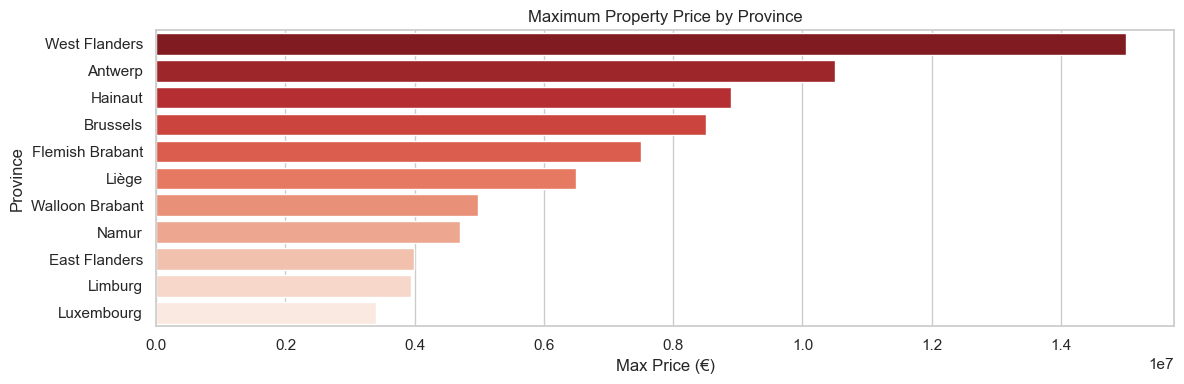

C:\Users\Neo\AppData\Local\Temp\ipykernel_26108\1950051231.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


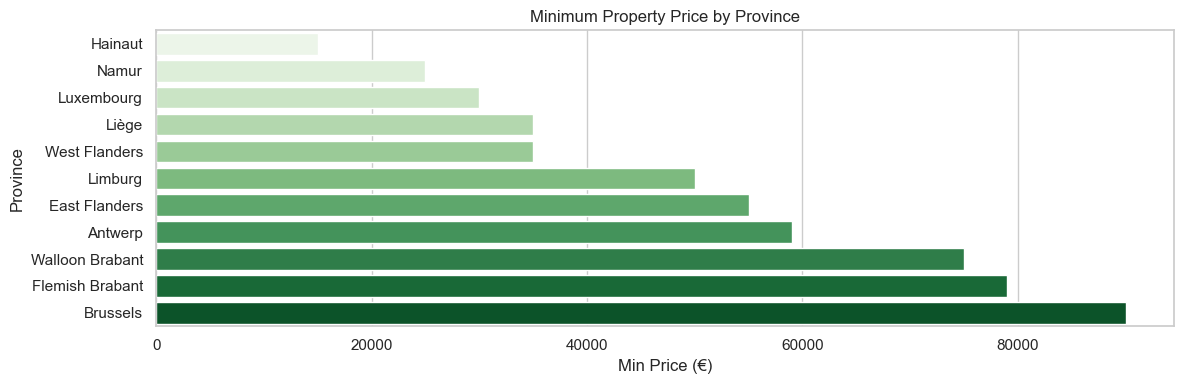

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Remove rows with missing or invalid living area to avoid division by zero
df_prov = df_cleaned[df_cleaned["habitableSurface"] > 0].copy()

# Compute price per m²
df_prov["price_per_m2"] = df_prov["price"] / df_prov["habitableSurface"]

# Group by province and compute aggregated statistics
province_stats = df_prov.groupby("province").agg(
    max_price=("price", "max"),
    min_price=("price", "min"),
    mean_price=("price", "mean"),
    median_price=("price", "median"),
    avg_price_per_m2=("price_per_m2", "mean"),
    listing_count=("price", "count")
).reset_index()

# Print provinces present in the dataset
print("Provinces found in the dataset:")
print(province_stats["province"].unique())
print(f"Number of provinces found: {province_stats['province'].nunique()}")

# === Plot: Maximum property price by province ===
province_max_sorted = province_stats.sort_values("max_price", ascending=False)
plt.figure(figsize=(12, 4))
sns.barplot(
    data=province_max_sorted,
    x="max_price",
    y="province",
    palette="Reds_r"
)
plt.title("Maximum Property Price by Province")
plt.xlabel("Max Price (€)")
plt.ylabel("Province")
plt.tight_layout()
plt.show()

# === Plot: Minimum property price by province ===
province_min_sorted = province_stats.sort_values("min_price", ascending=True)
plt.figure(figsize=(12, 4))
sns.barplot(
    data=province_min_sorted,
    x="min_price",
    y="province",
    palette="Greens"
)
plt.title("Minimum Property Price by Province")
plt.xlabel("Min Price (€)")
plt.ylabel("Province")
plt.tight_layout()
plt.show()


## 3.5 What are the most expensive municipalities in Belgium? (average price, median price, price per m<sup>2</sup>)  

Top 10 most expensive municipalities (by average price):

                      average_price  median_price  price_per_m2
locality                                                       
Knokke-Heist            1 571 032 €   1 095 000 €      10 889 €
Knokke                  1 211 940 €     870 000 €       9 849 €
Uccle                     951 340 €     650 000 €       4 453 €
Ixelles                   932 843 €     680 000 €       4 803 €
Woluwe-Saint-Pierre       841 123 €     670 000 €       4 191 €
Bruxelles                 634 045 €     407 000 €       3 832 €
Antwerpen                 548 453 €     365 000 €       3 823 €
Woluwe-Saint-Lambert      508 461 €     450 000 €       4 068 €
Leuven                    489 460 €     340 000 €       6 718 €
Brugge                    487 246 €     385 000 €       3 409 €


C:\Users\Neo\AppData\Local\Temp\ipykernel_48824\772126699.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


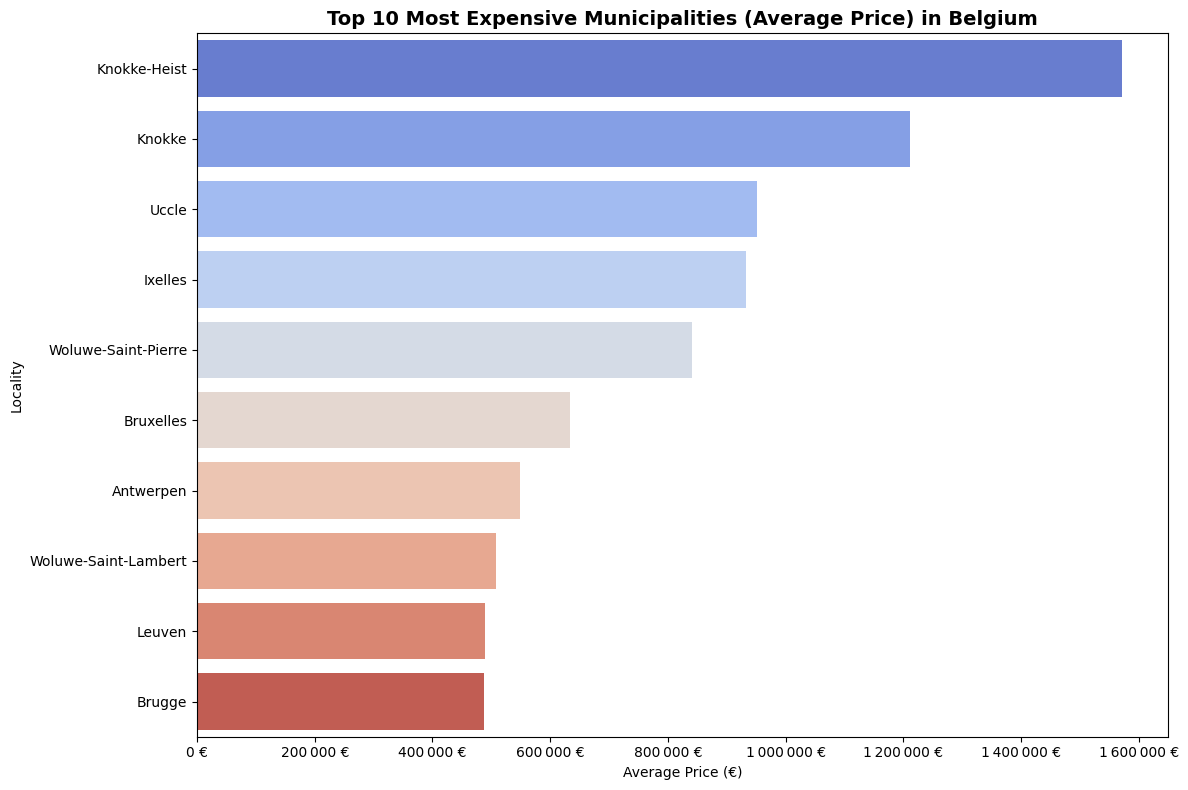

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Load and clean dataset
df = pd.read_csv("../data/immoweb_real_estate_cleaned_dataset.csv")
df.columns = df.columns.str.strip()

# Convert price and surface to numeric
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["habitableSurface"] = pd.to_numeric(df["habitableSurface"], errors="coerce")
df = df.dropna(subset=["price", "habitableSurface", "locality"])

# Compute price per m²
df = df[df["habitableSurface"] > 10]
df["price_per_m2"] = df["price"] / df["habitableSurface"]

# Filter top 30 most represented localities
top_localities = df["locality"].value_counts().nlargest(30).index
df_top = df[df["locality"].isin(top_localities)]

# Compute stats
price_stats = df_top.groupby("locality").agg(
    average_price=("price", "mean"),
    median_price=("price", "median"),
    price_per_m2=("price_per_m2", "mean"),
    count=("price", "count")
).sort_values("average_price", ascending=False)

# Format display in console
pd.options.display.float_format = lambda x: f"{x:,.0f}".replace(",", "\u202f") + " €"

print("Top 10 most expensive municipalities (by average price):\n")
print(price_stats[["average_price", "median_price", "price_per_m2"]].head(10))

# Plot with formatted x-axis
plt.figure(figsize=(12, 8))
sns.barplot(
    data=price_stats.reset_index().head(10),
    y="locality", x="average_price", palette="coolwarm"
)
plt.title("Top 10 Most Expensive Municipalities (Average Price) in Belgium", fontsize=14, weight="bold")
plt.xlabel("Average Price (€)")
plt.ylabel("Locality")

# Formatter with thousands separator using thin space
formatter = ticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", "\u202f") + " €")
plt.gca().xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()


## 3.6 What are the most expensive municipalities in Wallonia?  

C:\Users\Neo\AppData\Local\Temp\ipykernel_11428\546520824.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


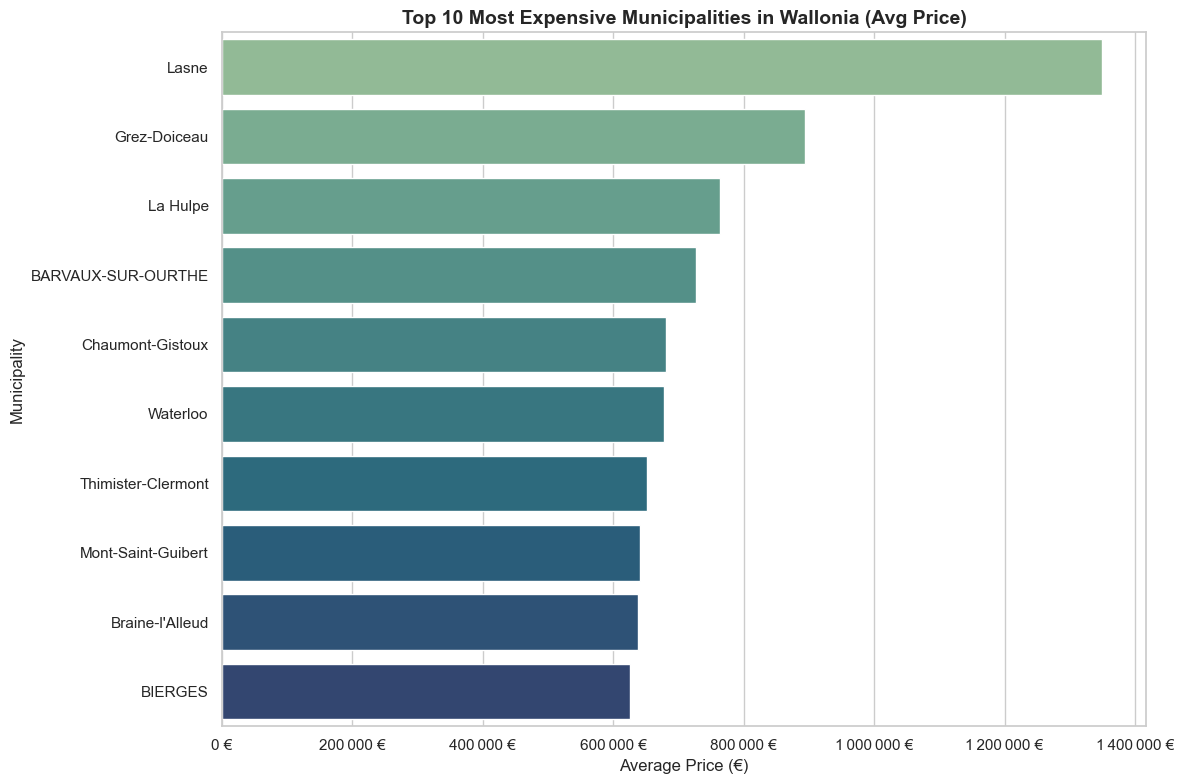

             locality  average_price  median_price  price_per_m2  count
0               Lasne    1 349 415 €   1 167 500 €       3 749 €     62
1        Grez-Doiceau      894 187 €     575 000 €       2 836 €     47
2            La Hulpe      763 135 €     530 000 €       3 653 €     37
3  BARVAUX-SUR-OURTHE      727 642 €     370 425 €       3 226 €     18
4    Chaumont-Gistoux      680 905 €     675 000 €       3 548 €     46
5            Waterloo      677 243 €     550 000 €       3 520 €    205
6  Thimister-Clermont      651 500 €     459 500 €       2 057 €     16
7  Mont-Saint-Guibert      640 417 €     440 000 €       3 200 €     18
8     Braine-l'Alleud      637 945 €     425 000 €       3 007 €    197
9             BIERGES      626 000 €     425 000 €       2 707 €     13


In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the real dataset
df = pd.read_csv("../data/immoweb_real_estate_cleaned_dataset.csv")
df.columns = df.columns.str.strip()

# Clean and filter required columns
df = df[["locality", "province", "price", "habitableSurface"]].copy()
df = df.dropna(subset=["locality", "province", "price", "habitableSurface"])
df = df[df["habitableSurface"] > 10]  # Remove suspiciously small surfaces

# Compute price per square meter
df["price_per_m2"] = df["price"] / df["habitableSurface"]

# Keep only municipalities in Wallonia
walloon_provinces = [
    "Walloon Brabant", "Hainaut", "Liège", "Luxembourg", "Namur"
]
df_wallonia = df[df["province"].isin(walloon_provinces)]

# Aggregate statistics by locality
wallonia_stats = df_wallonia.groupby("locality").agg(
    average_price=("price", "mean"),
    median_price=("price", "median"),
    price_per_m2=("price_per_m2", "mean"),
    count=("price", "count")
)

# Keep only localities with at least 10 listings for reliability
wallonia_stats = wallonia_stats[wallonia_stats["count"] >= 10]

# Sort by average price descending
wallonia_top10 = wallonia_stats.sort_values("average_price", ascending=False).head(10)

import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(12, 8))
sns.barplot(
    data=wallonia_top10.reset_index(),
    y="locality", x="average_price", palette="crest"
)

plt.title("Top 10 Most Expensive Municipalities in Wallonia (Avg Price)", fontsize=14, weight="bold")
plt.xlabel("Average Price (€)")
plt.ylabel("Municipality")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", "\u202f") + " €"))
plt.tight_layout()
plt.show()

print(wallonia_top10.reset_index())


# 3.8 What are the least expensive municipalities in Belgium?  

C:\Users\Neo\AppData\Local\Temp\ipykernel_48824\1221351647.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom10, y="locality", x="average_price", palette="rocket")


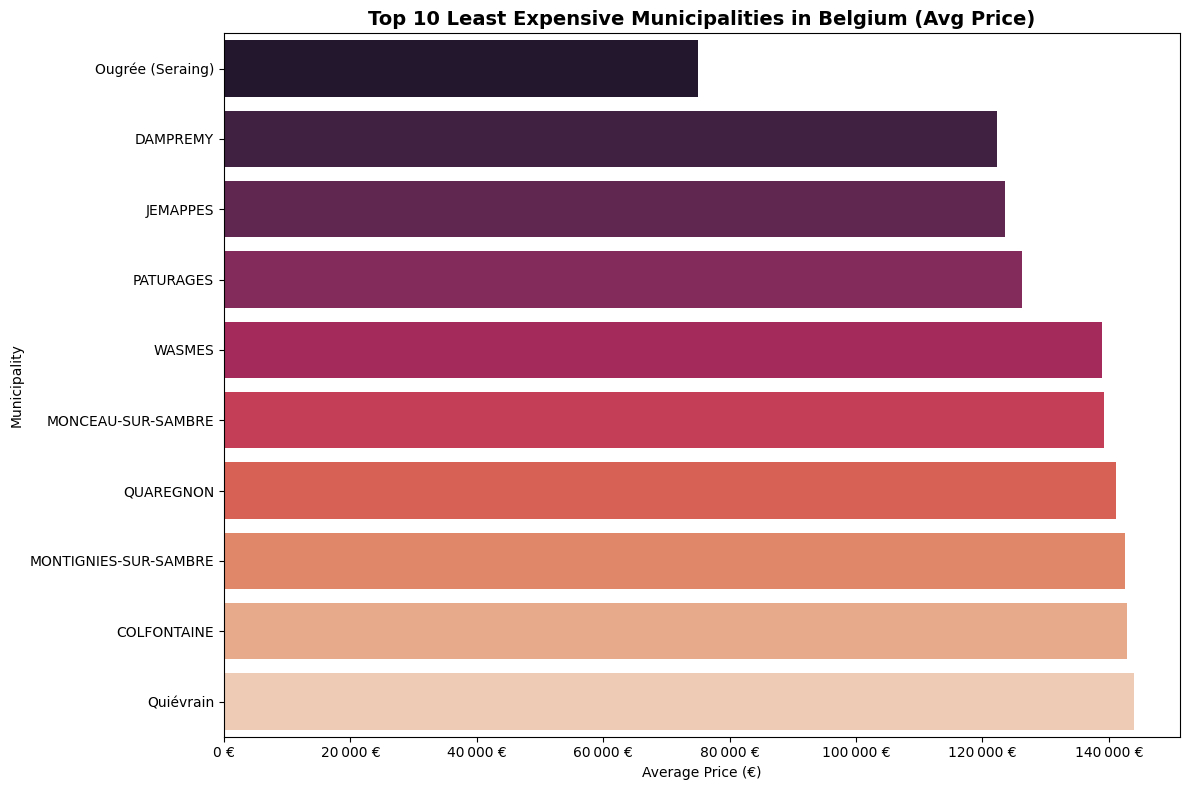

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Load the dataset
df = pd.read_csv("../data/immoweb_real_estate_cleaned_dataset.csv")
df.columns = df.columns.str.strip()

# Keep necessary columns and clean data
df = df[["locality", "province", "price", "habitableSurface"]].dropna()
df = df[df["habitableSurface"] > 10]
df["price_per_m2"] = df["price"] / df["habitableSurface"]

# Compute stats by locality
belgium_stats = df.groupby("locality").agg(
    average_price=("price", "mean"),
    median_price=("price", "median"),
    price_per_m2=("price_per_m2", "mean"),
    count=("price", "count")
)
belgium_stats = belgium_stats[belgium_stats["count"] >= 10]
bottom10 = belgium_stats.sort_values("average_price", ascending=True).head(10).reset_index()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=bottom10, y="locality", x="average_price", palette="rocket")
plt.title("Top 10 Least Expensive Municipalities in Belgium (Avg Price)", fontsize=14, weight="bold")
plt.xlabel("Average Price (€)")
plt.ylabel("Municipality")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", "\u202f") + " €"))
plt.tight_layout()

# Removed ace_tools as it is not installed or required
plt.show()





In [ ]:
## 3.8 What are the most expensive municipalities in Flanders?  


C:\Users\Neo\AppData\Local\Temp\ipykernel_11428\861017717.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


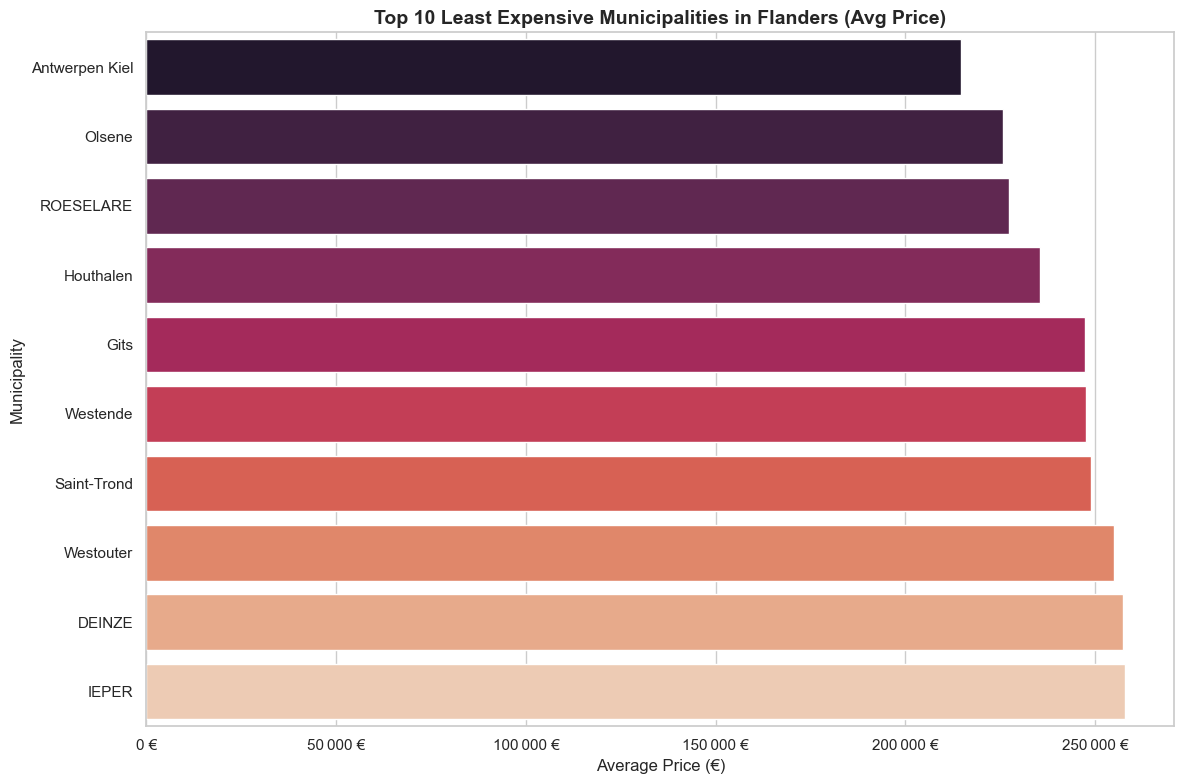

In [52]:
# Chargement et nettoyage des données pour la Flandre
df = pd.read_csv("../data/immoweb_real_estate_cleaned_dataset.csv")
df.columns = df.columns.str.strip()
df = df[["locality", "province", "price", "habitableSurface"]].dropna()
df = df[df["habitableSurface"] > 10]
df["price_per_m2"] = df["price"] / df["habitableSurface"]

# Filtrer les provinces flamandes
flemish_provinces = ["Antwerp", "East Flanders", "West Flanders", "Flemish Brabant", "Limburg"]
df_flanders = df[df["province"].isin(flemish_provinces)]

# Statistiques par commune
flanders_stats = df_flanders.groupby("locality").agg(
    average_price=("price", "mean"),
    median_price=("price", "median"),
    price_per_m2=("price_per_m2", "mean"),
    count=("price", "count")
)
flanders_stats = flanders_stats[flanders_stats["count"] >= 10]

# 10 communes les moins chères
flanders_bottom10 = flanders_stats.sort_values("average_price", ascending=True).head(10)

# Affichage du graphe
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(12, 8))
sns.barplot(
    data=flanders_bottom10.reset_index(),
    y="locality", x="average_price", palette="rocket"
)
plt.title("Top 10 Least Expensive Municipalities in Flanders (Avg Price)", fontsize=14, weight="bold")
plt.xlabel("Average Price (€)")
plt.ylabel("Municipality")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", "\u202f") + " €"))
plt.tight_layout()
plt.show()


# 5. Interpretation and Business Insights

## 5.1. Summary of Key Findings

- Property prices vary significantly by region and locality, with Antwerp and Brussels showing the highest price ranges.
- Some provinces offer more affordable opportunities, reflected in lower minimum prices.
- Not all provinces are fully represented in the dataset, limiting the geographic coverage and representativeness of the analysis.
- Missing data in several key features may affect the accuracy and robustness of pricing insights.

## 5.2. Business Recommendations for ImmoEliza

- Focus marketing and lead generation efforts in high-value regions to attract premium listings.
- Highlight and promote affordable housing options in lower-priced provinces to capture a wider customer base.
- Improve data collection and completeness, especially for critical features such as surface area and number of rooms, to strengthen predictive pricing models and client trust.

## 5.3. Data Limitations

- Several features have high missing rates, which may introduce bias or reduce model reliability.
- The dataset excludes some towns and provinces, possibly due to incomplete or unnormalized geographic data.
- Extreme outliers and missing values in numerical features limit the precision of descriptive and comparative analysis.
